# COHP Analysis

Total DOS:

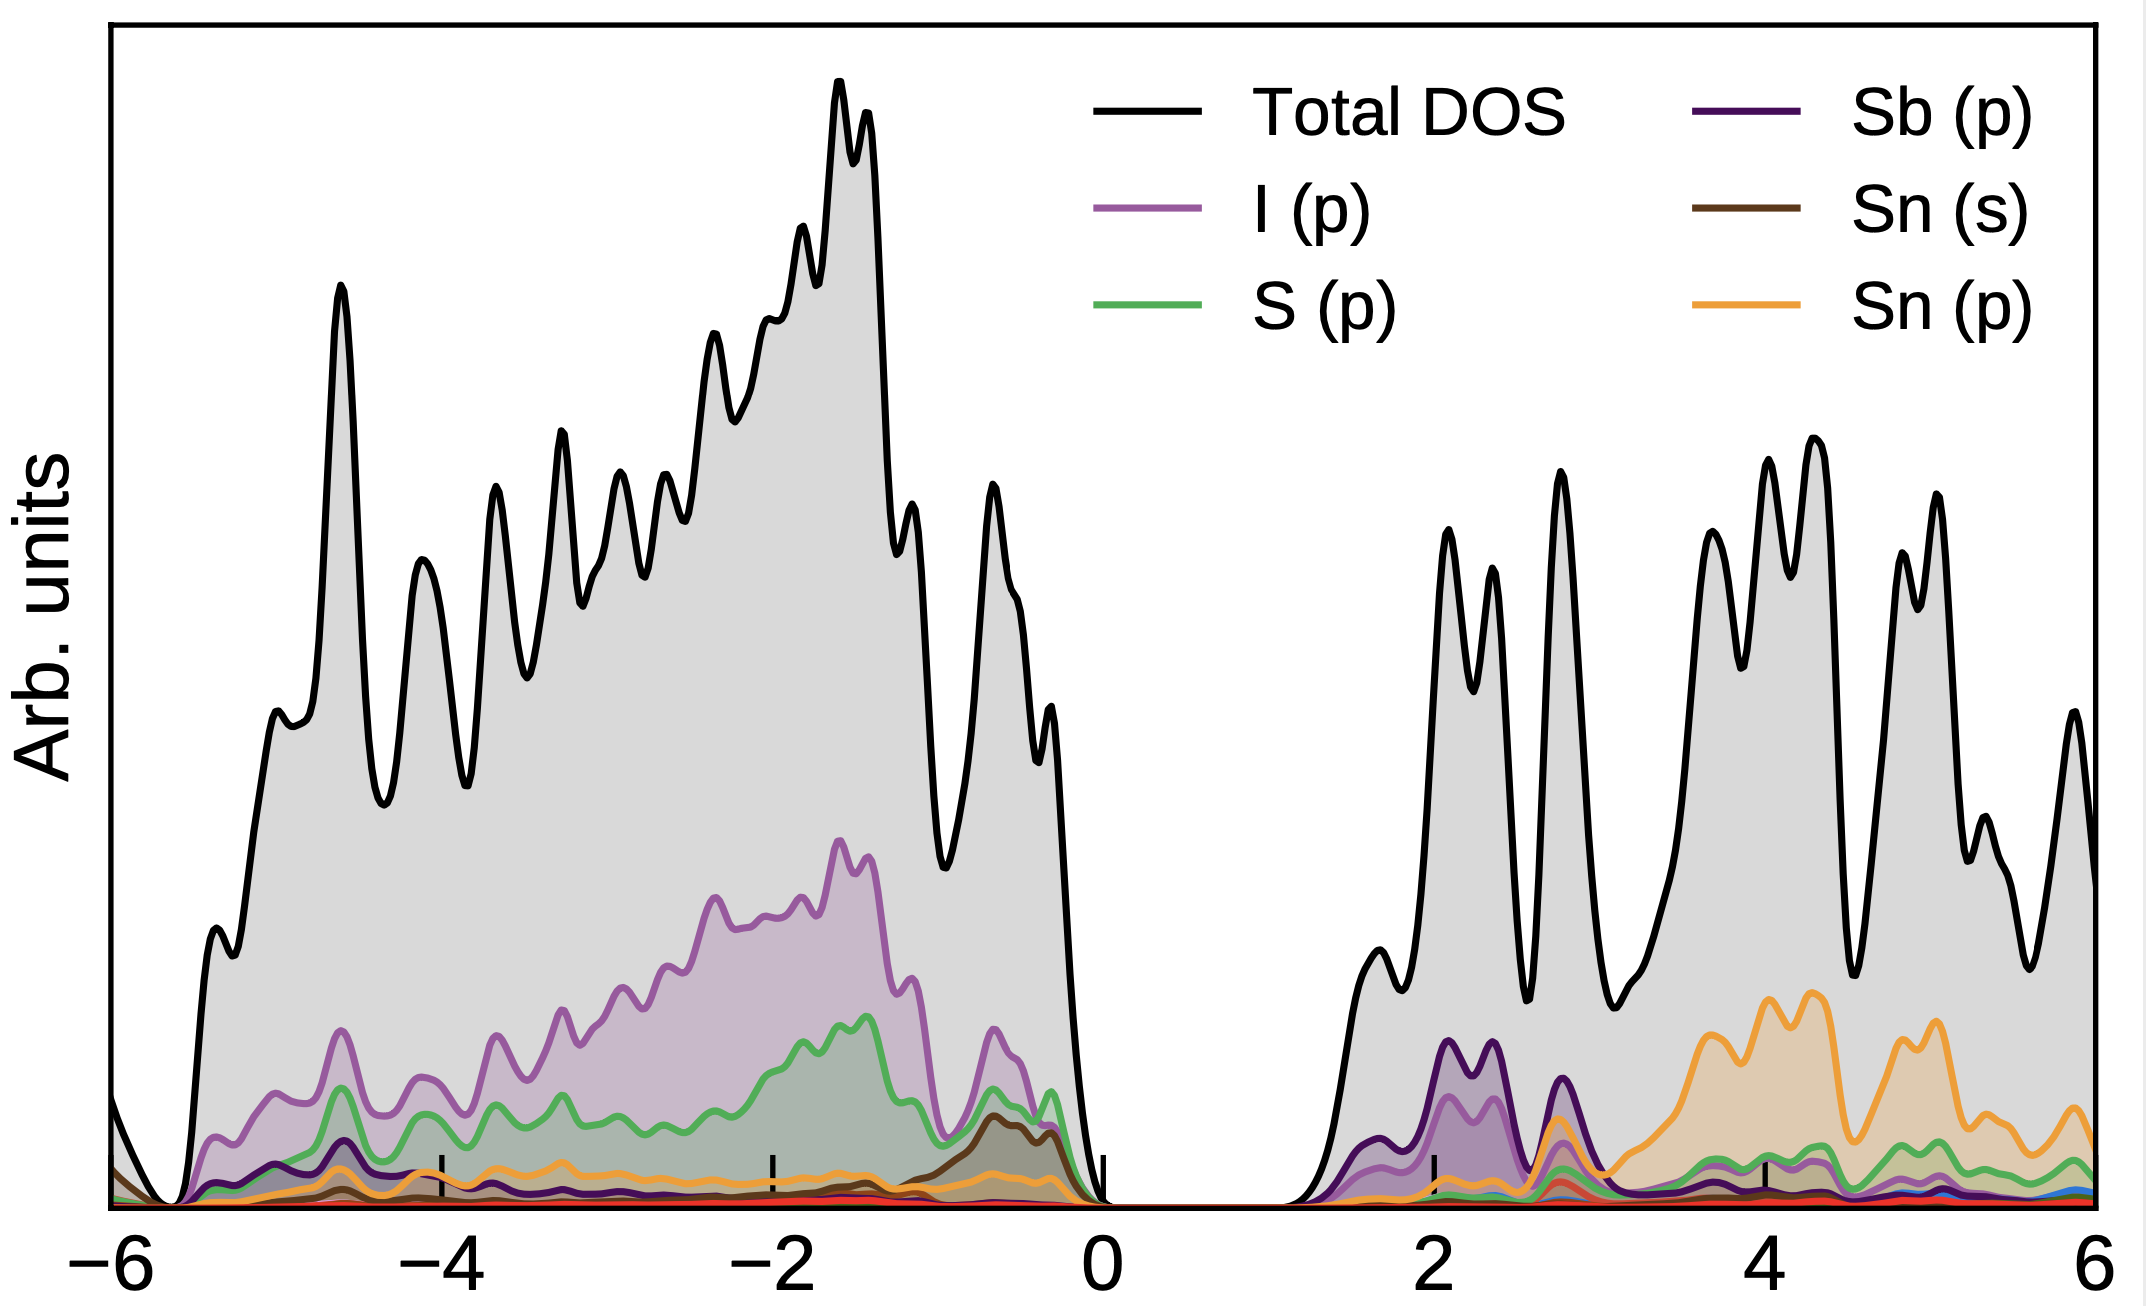

Looking at the DOS, I'm thinking $Sn^{2+}$ anti-bonding with $S^{2-}$ and $I^-$ at the VBM

Let's also have a look at $Sb^{3+}$ bonding behaviour with $I^-$ at the CBM

In [1]:
from pymatgen.electronic_structure.plotter import CohpPlotter
from pymatgen.electronic_structure.cohp import  CompleteCohp
%matplotlib inline

In [2]:
Total_COHPCAR_path = "Cmc2_1_Lobster/upto4_COHPCAR.lobster"
Sn_I_orbital_proj_COHPCAR_path = "Cmc2_1_Lobster/Sn_I_upto4_COHPCAR.lobster"
Sn_S_orbital_proj_COHPCAR_path = "Cmc2_1_Lobster/Sn_S_upto4_COHPCAR.lobster"
Sb_I_orbital_proj_COHPCAR_path = "Cmc2_1_Lobster/Sb_I_upto4_COHPCAR.lobster"
POSCAR_path = "Cmc2_1_Lobster/CONTCAR"

total_cohp = CompleteCohp.from_file(fmt="LOBSTER",filename=Total_COHPCAR_path, structure_file=POSCAR_path)
Sn_I_orbital_proj_cohp = CompleteCohp.from_file(fmt="LOBSTER",filename=Sn_I_orbital_proj_COHPCAR_path, structure_file=POSCAR_path)
Sn_S_orbital_proj_cohp = CompleteCohp.from_file(fmt="LOBSTER",filename=Sn_S_orbital_proj_COHPCAR_path, structure_file=POSCAR_path)
Sb_I_orbital_proj_cohp = CompleteCohp.from_file(fmt="LOBSTER",filename=Sb_I_orbital_proj_COHPCAR_path, structure_file=POSCAR_path)

/Users/kavanase/anaconda3/lib/python3.7/site-packages/pymatgen/electronic_structure/cohp.py:744: UserWarning: The bond labels are currently consistent with ICOHPLIST.lobster/ICOOPLIST.lobster, not with COHPCAR.lobster/COOPCAR.lobster. Please be aware!
  "The bond labels are currently consistent with ICOHPLIST.lobster/ICOOPLIST.lobster, not with "


In [4]:
!head Cmc2_1_Lobster/upto4_ICOHPLIST.lobster

  COHP#  atomMU  atomNU     distance     translation      ICOHP (at) eF   for spin  1
      1     Sn1     Sn2      3.78679      -1   1   0           -0.48664 
      2     Sn1      S7      2.85032      -1   0   0           -1.96831 
      3     Sn1      S7      2.85032       0   1   0           -1.96829 
      4     Sn1      S8      2.60135       0   0   0           -3.73717 
      5     Sn1     I14      3.16760      -1   0   0           -1.71353 
      6     Sn1     I14      3.16760       0   1   0           -1.71366 
      7     Sn2      S7      2.69639       0   0   0           -2.87729 
      8     Sn2      S8      2.71205       0  -1   0           -3.04991 
      9     Sn2      S8      2.71205       1   0   0           -3.04997 


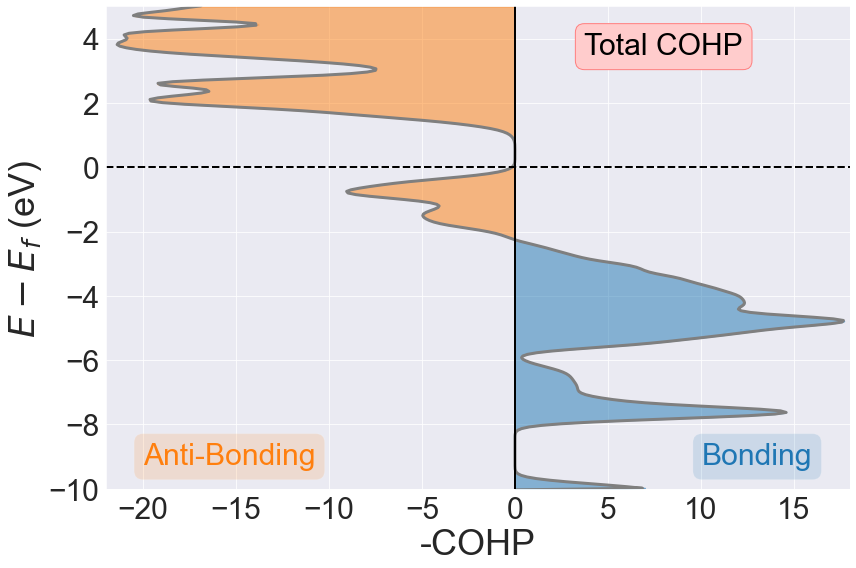

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
label="5" # Sn1-Sn2
cp=CohpPlotter()
#get a nicer plot label
plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

cp.add_cohp(plotlabel, total_cohp.get_summed_cohp_by_label_list(
    [str(i) for i in np.arange(1,65)]))#. #get_cohp_by_label(label=label))
#check which COHP you are plotting

#print("This is a COHP between the following sites: " + str(total_cohp.bonds[label]['sites'][0])+' and '+ str(total_cohp.bonds[label]['sites'][1]))

cp.get_plot(ylim=[-10, 5],xlim=[-22,18],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Total COHP", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Total_COHP.pdf", bbox_inches="tight")

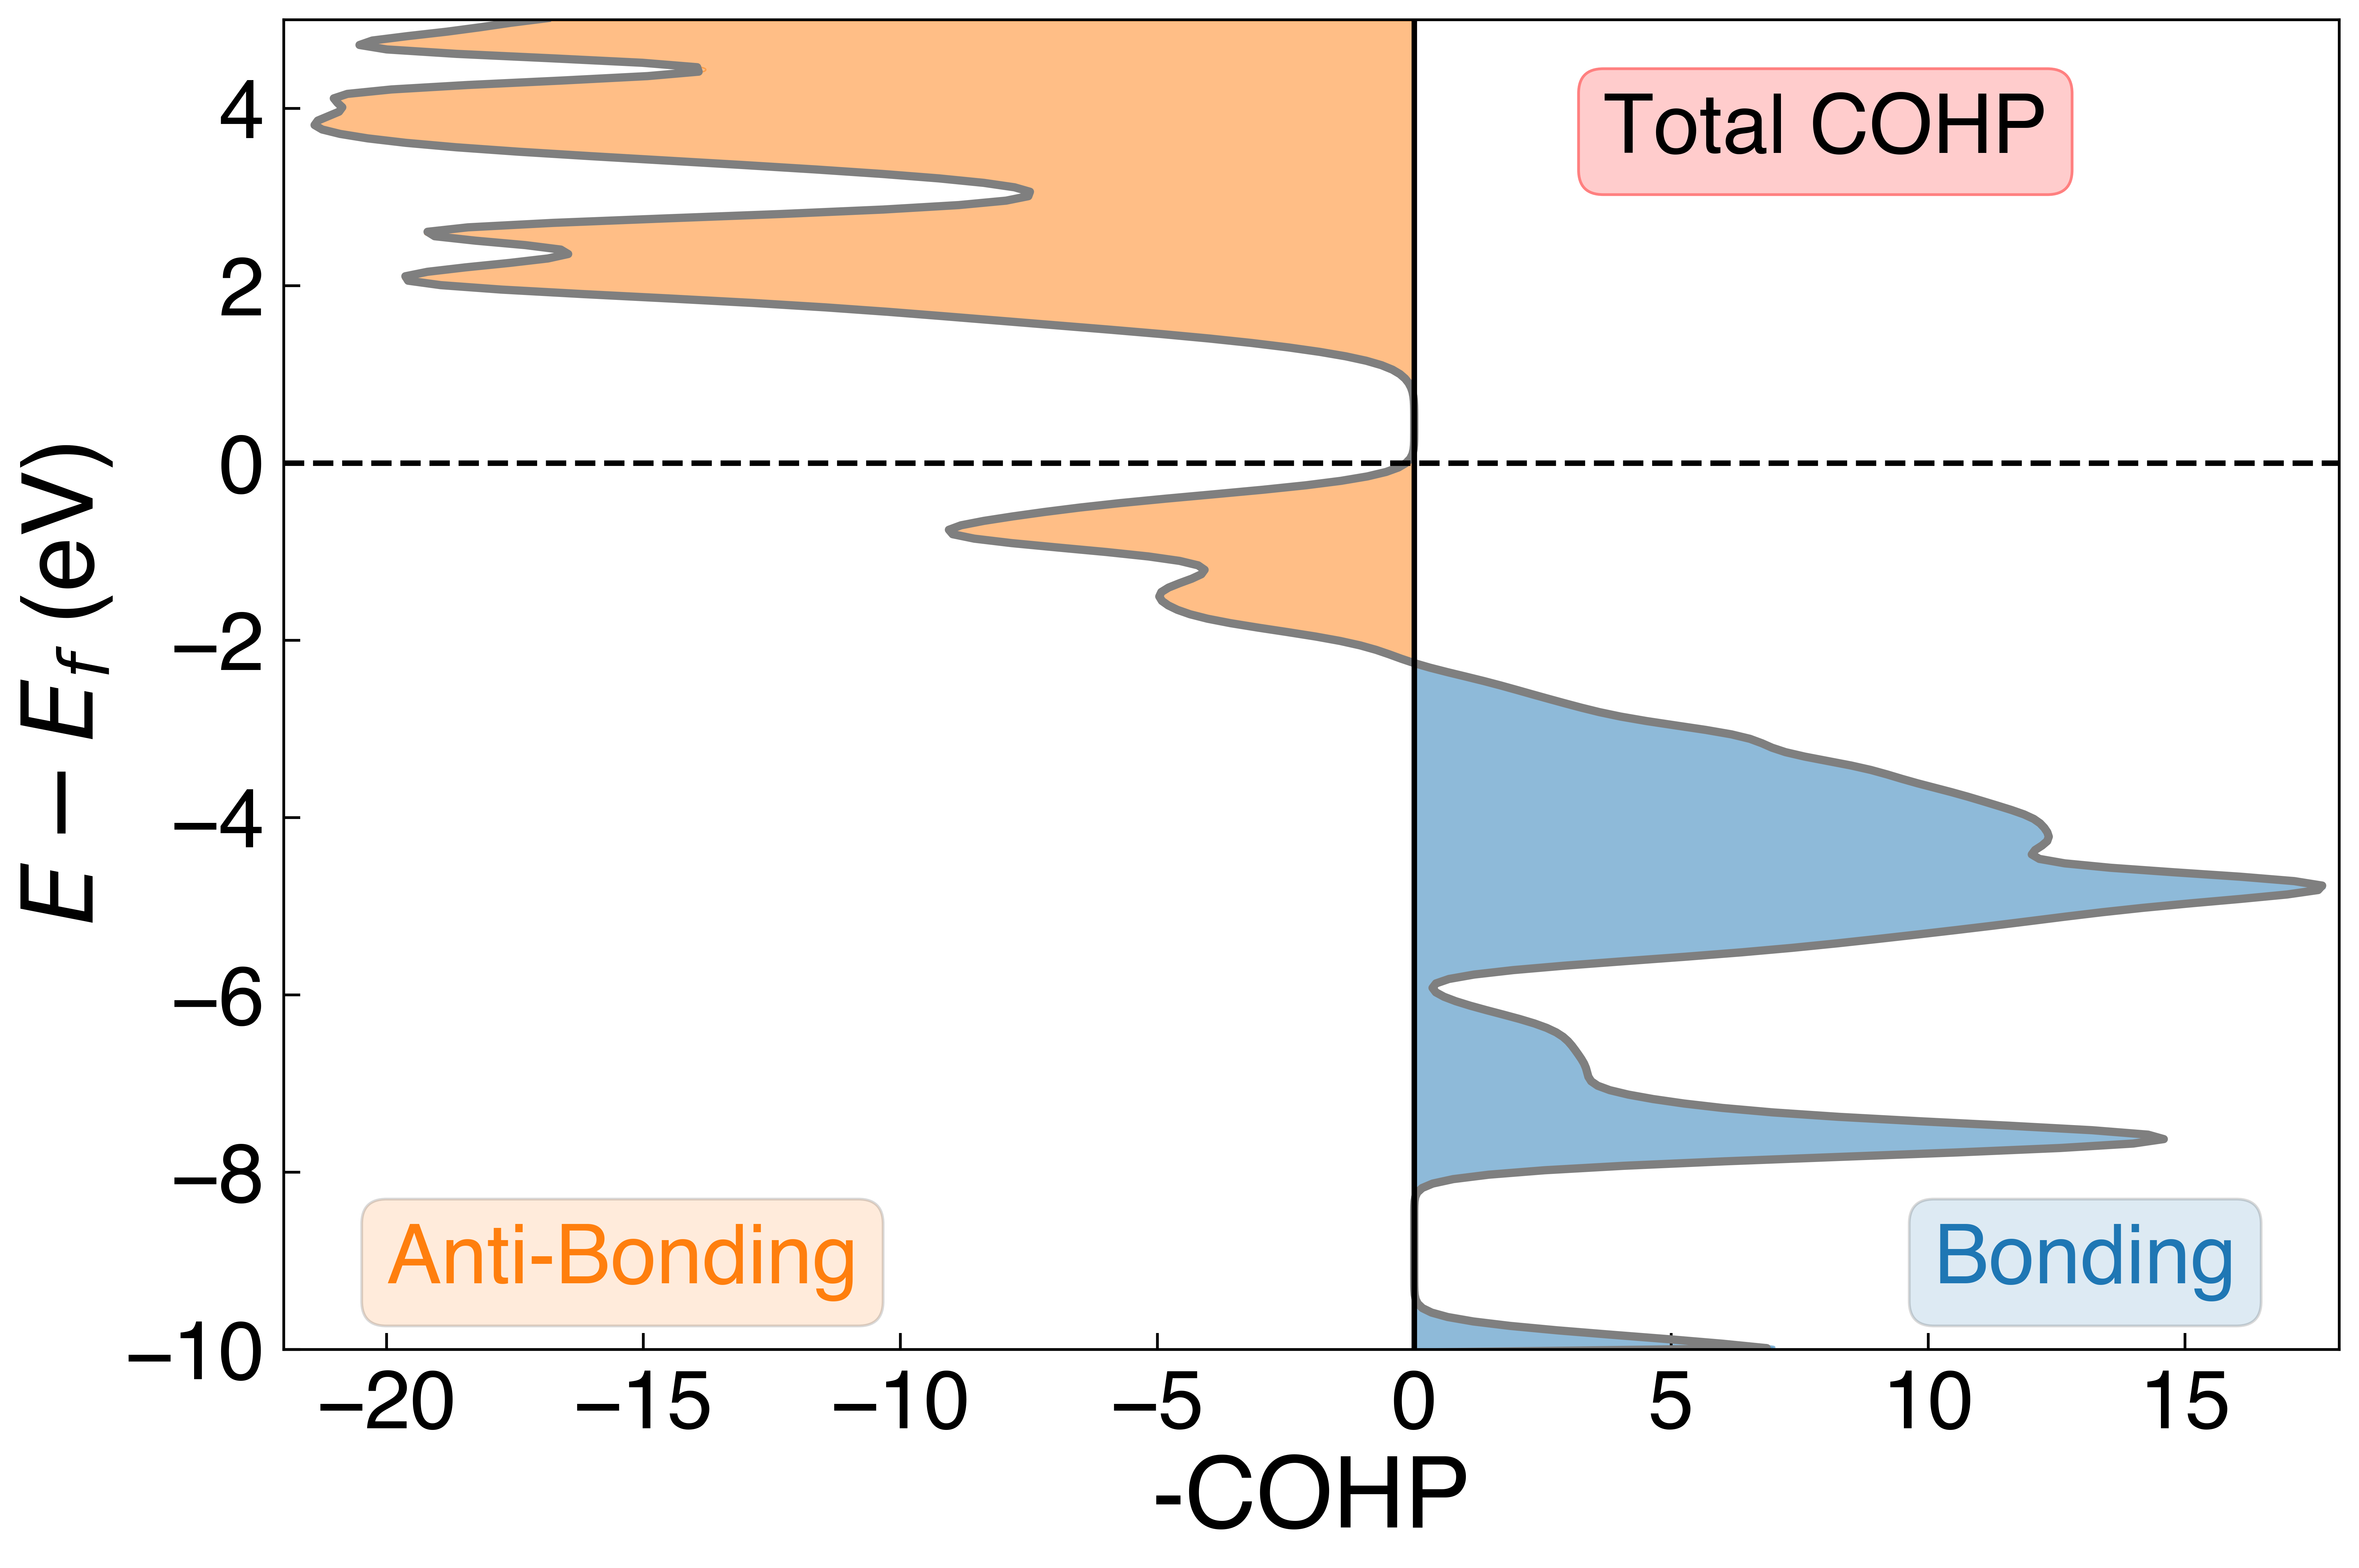

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

plt.style.use("../Packages/publication_style.mplstyle")
mpl.rc("lines", **{"linewidth": 2})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
label="5" # Sn1-Sn2
cp=CohpPlotter()
#get a nicer plot label
plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

cp.add_cohp(plotlabel, total_cohp.get_summed_cohp_by_label_list(
    [str(i) for i in np.arange(1,65)]))#. #get_cohp_by_label(label=label))
#check which COHP you are plotting

#print("This is a COHP between the following sites: " + str(total_cohp.bonds[label]['sites'][0])+' and '+ str(total_cohp.bonds[label]['sites'][1]))

cp.get_plot(ylim=[-10, 5],xlim=[-22,18],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Total COHP", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Total_COHP_PubStyle.pdf", bbox_inches="tight")

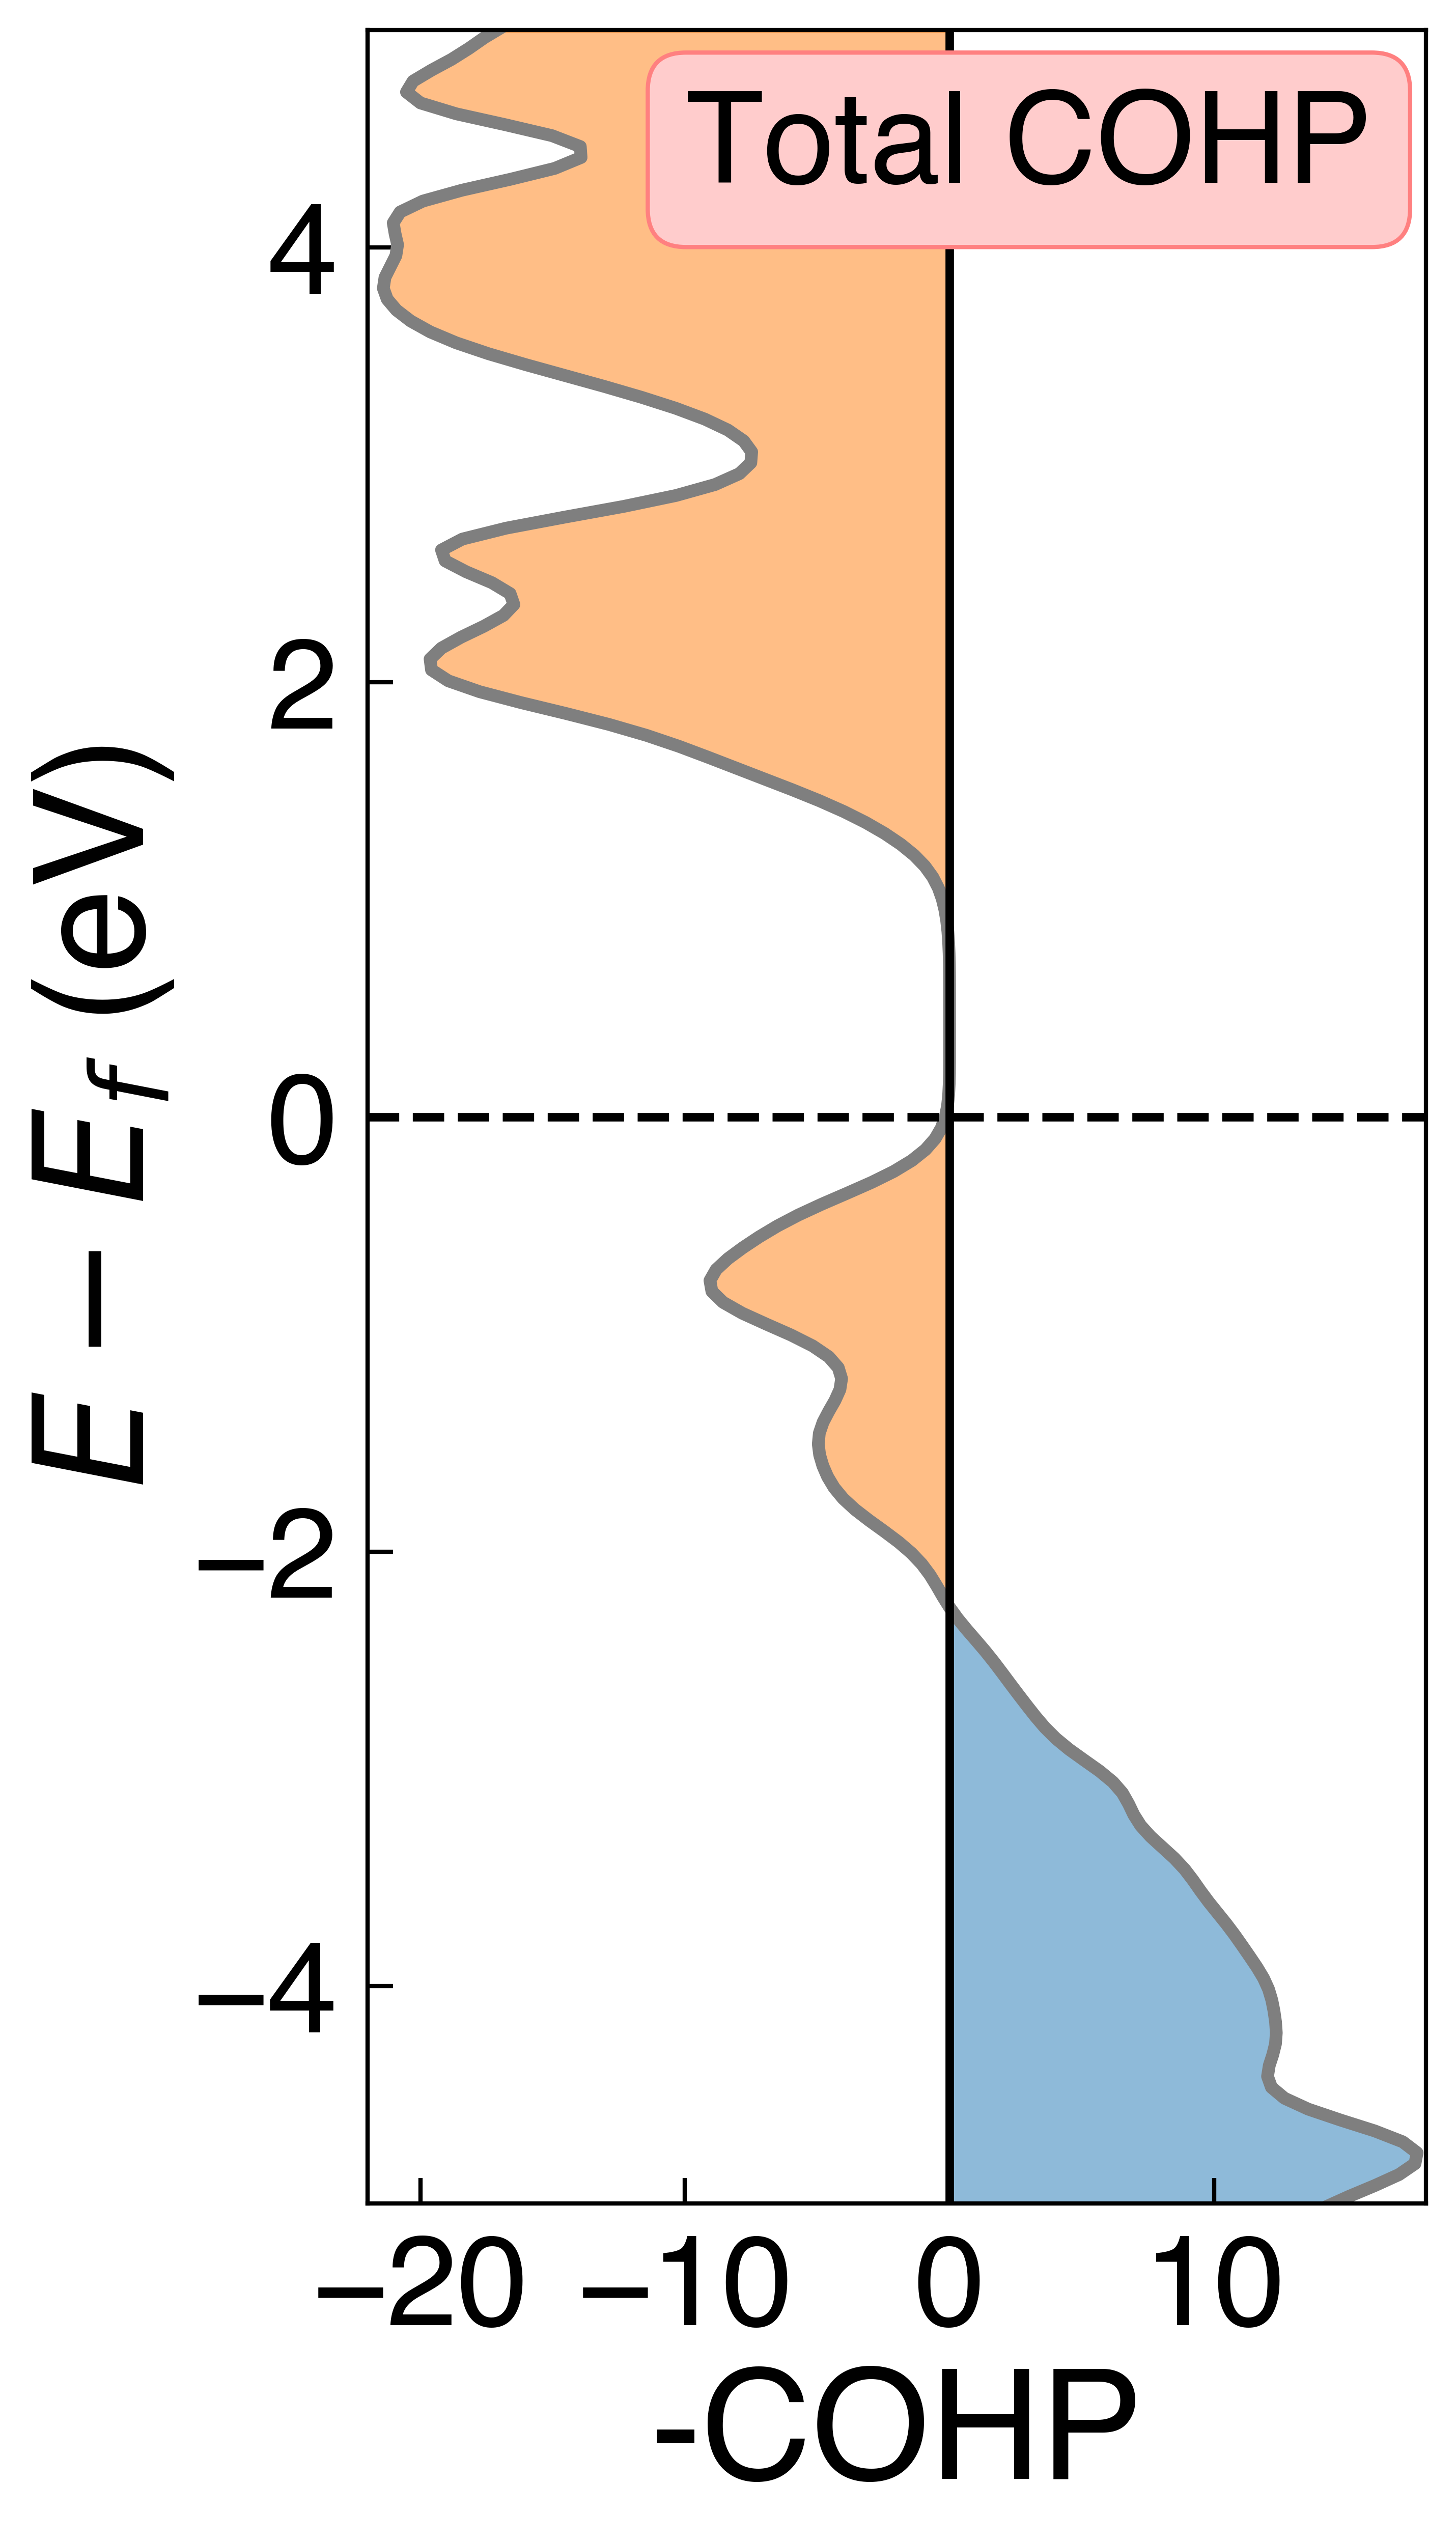

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

plt.style.use("../Packages/publication_style.mplstyle")
mpl.rc("lines", **{"linewidth": 2})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
label="5" # Sn1-Sn2
cp=CohpPlotter()
#get a nicer plot label
plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

cp.add_cohp(plotlabel, total_cohp.get_summed_cohp_by_label_list(
    [str(i) for i in np.arange(1,65)]))#. #get_cohp_by_label(label=label))
#check which COHP you are plotting

#print("This is a COHP between the following sites: " + str(total_cohp.bonds[label]['sites'][0])+' and '+ str(total_cohp.bonds[label]['sites'][1]))

cp.get_plot(ylim=[-10, 5],xlim=[-22,18],integrated=False); plot = plt.gca()
fig = plt.gcf()
fig.set_size_inches(4,8.463)
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
plot.set_ylim(-5,5)
text = plt.annotate(r"Total COHP", ha="center", color="k", xy=(0.625, 0.93), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
#plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
#                    xycoords='axes fraction', fontsize = 30,
#             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
#plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
#                    xycoords='axes fraction', fontsize = 30,
#             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plot.set_xticks([-20, -10, 0, 10])
plt.savefig("Cmc2_1_Lobster/Total_COHP_PubStyle_vert.png", bbox_inches="tight")

In [57]:
(3.014/2.938)*8.25

8.463410483321987

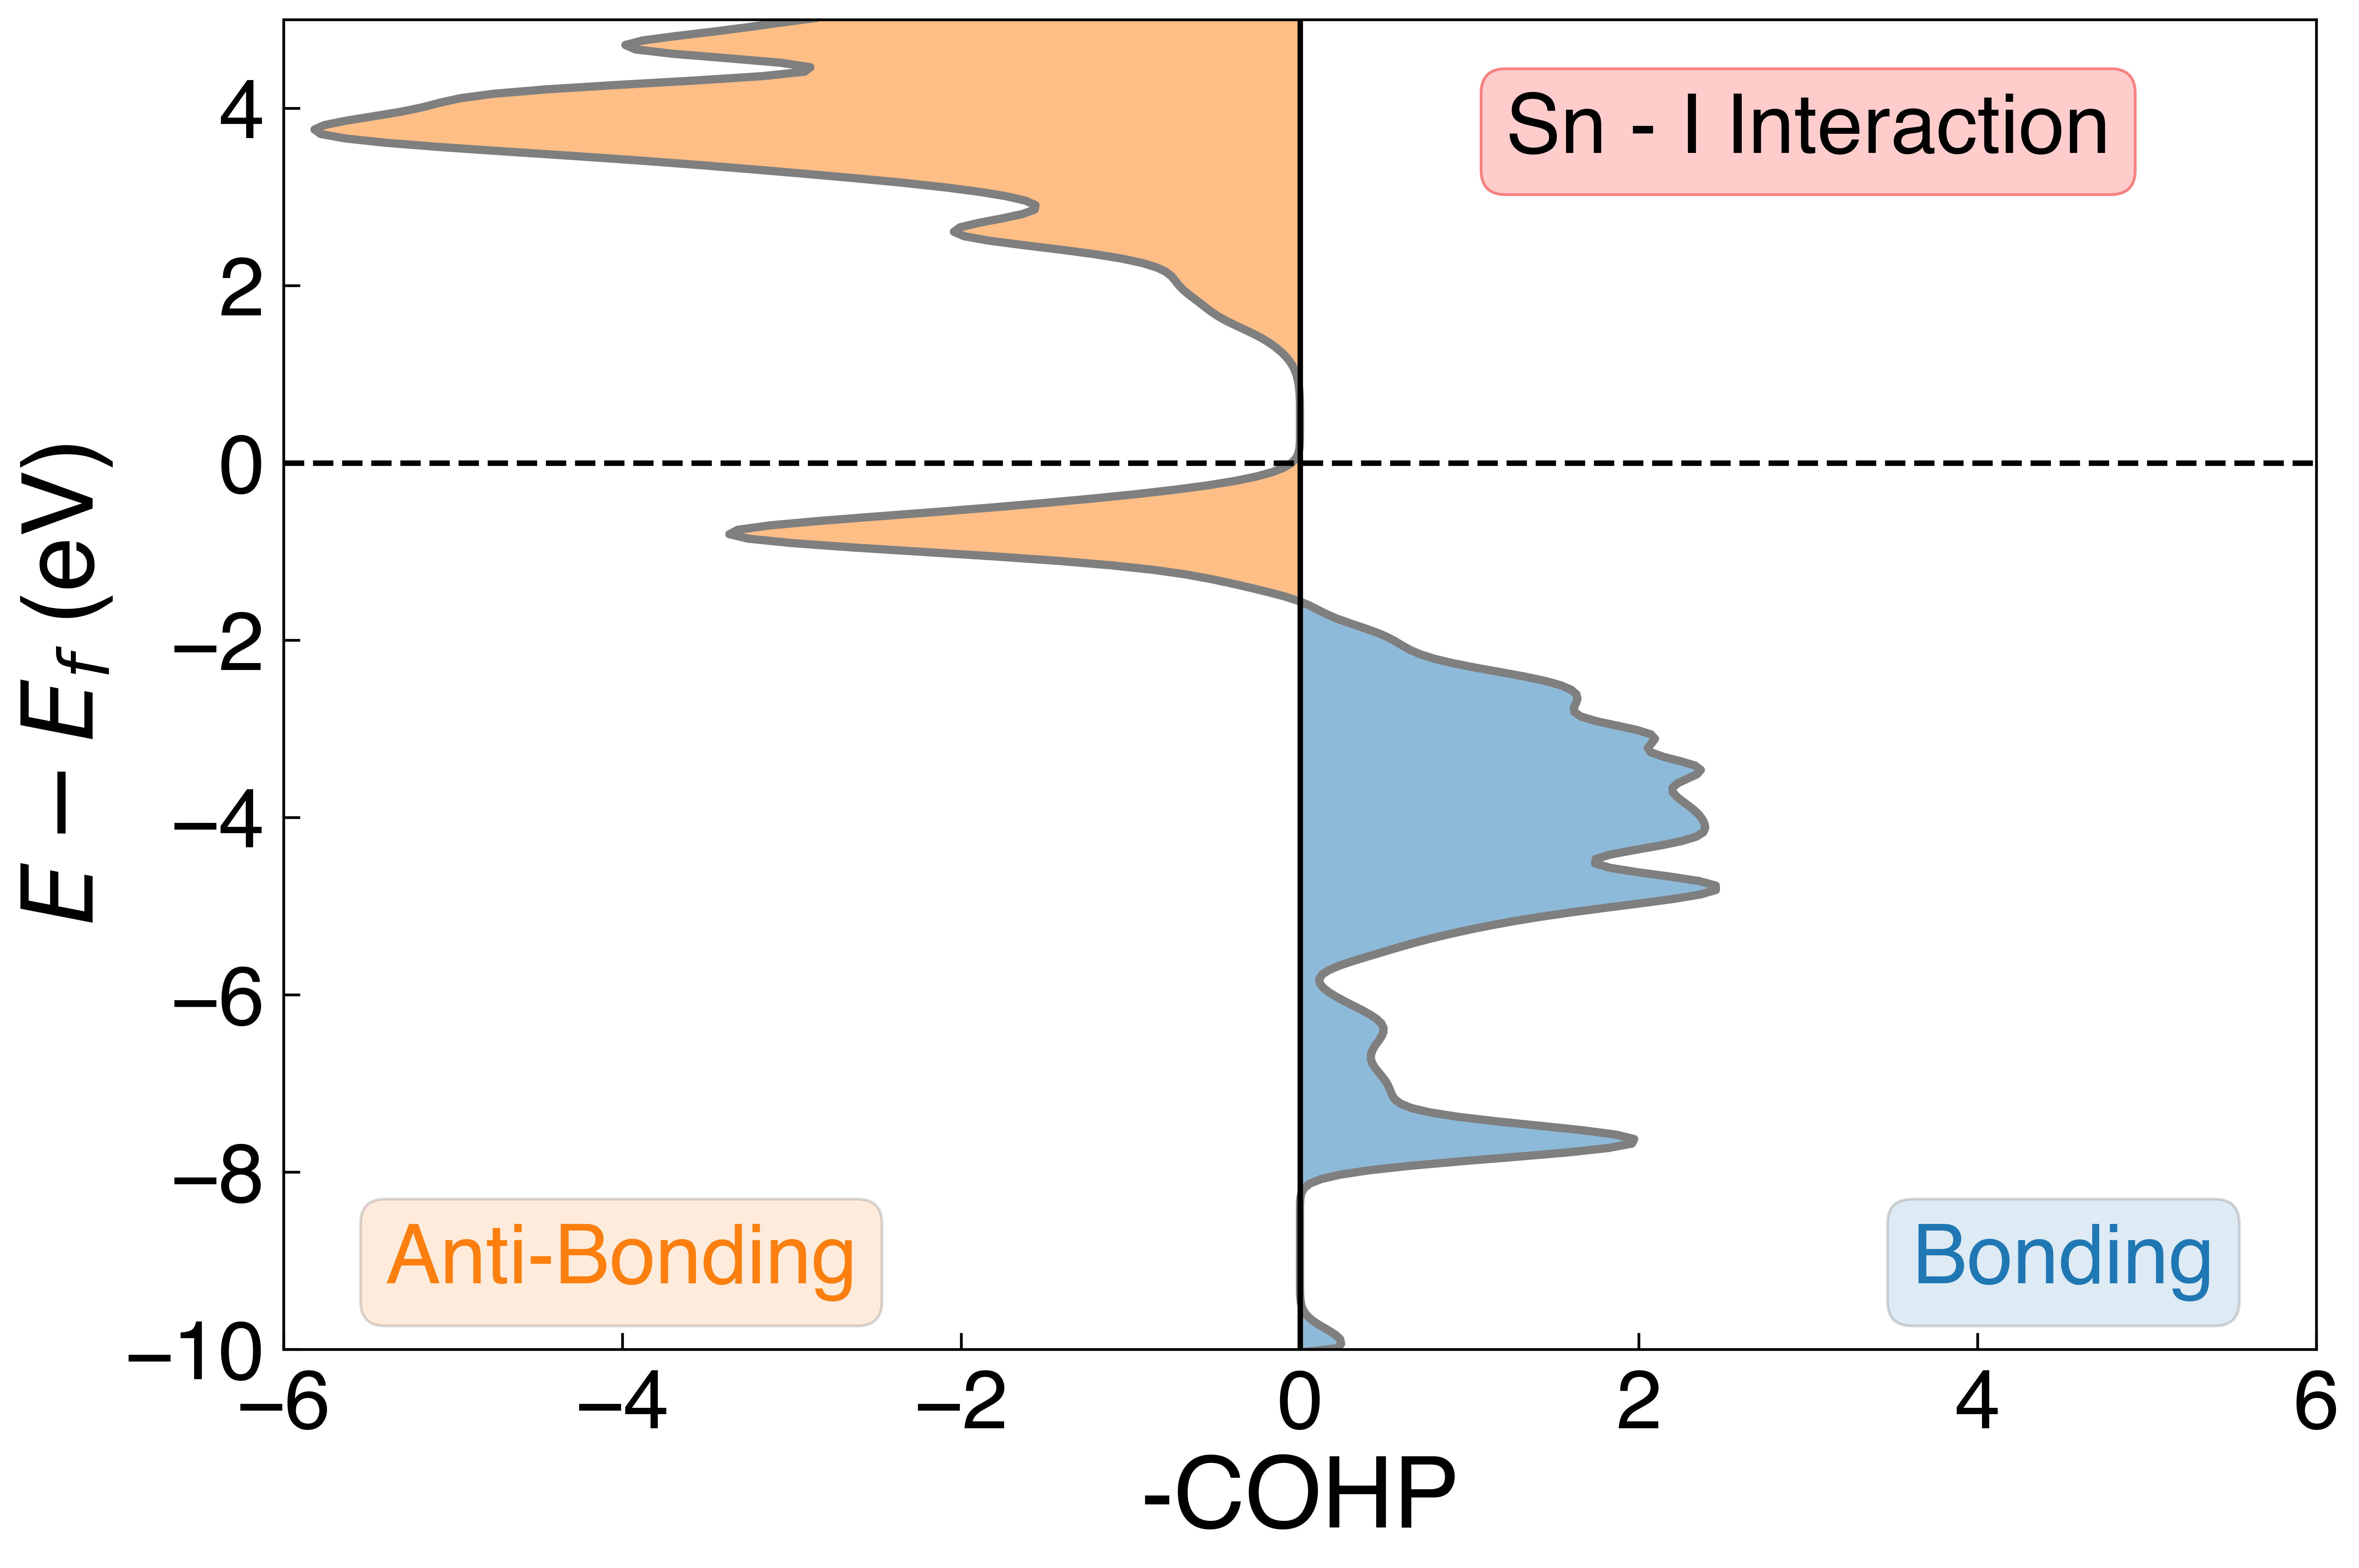

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

cp.add_cohp(plotlabel, Sn_I_orbital_proj_cohp.get_summed_cohp_by_label_list(
    [str(i) for i in np.arange(1,15)]))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn - I Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sn_I_Total_COHP_PubStyle.pdf", bbox_inches="tight")

42


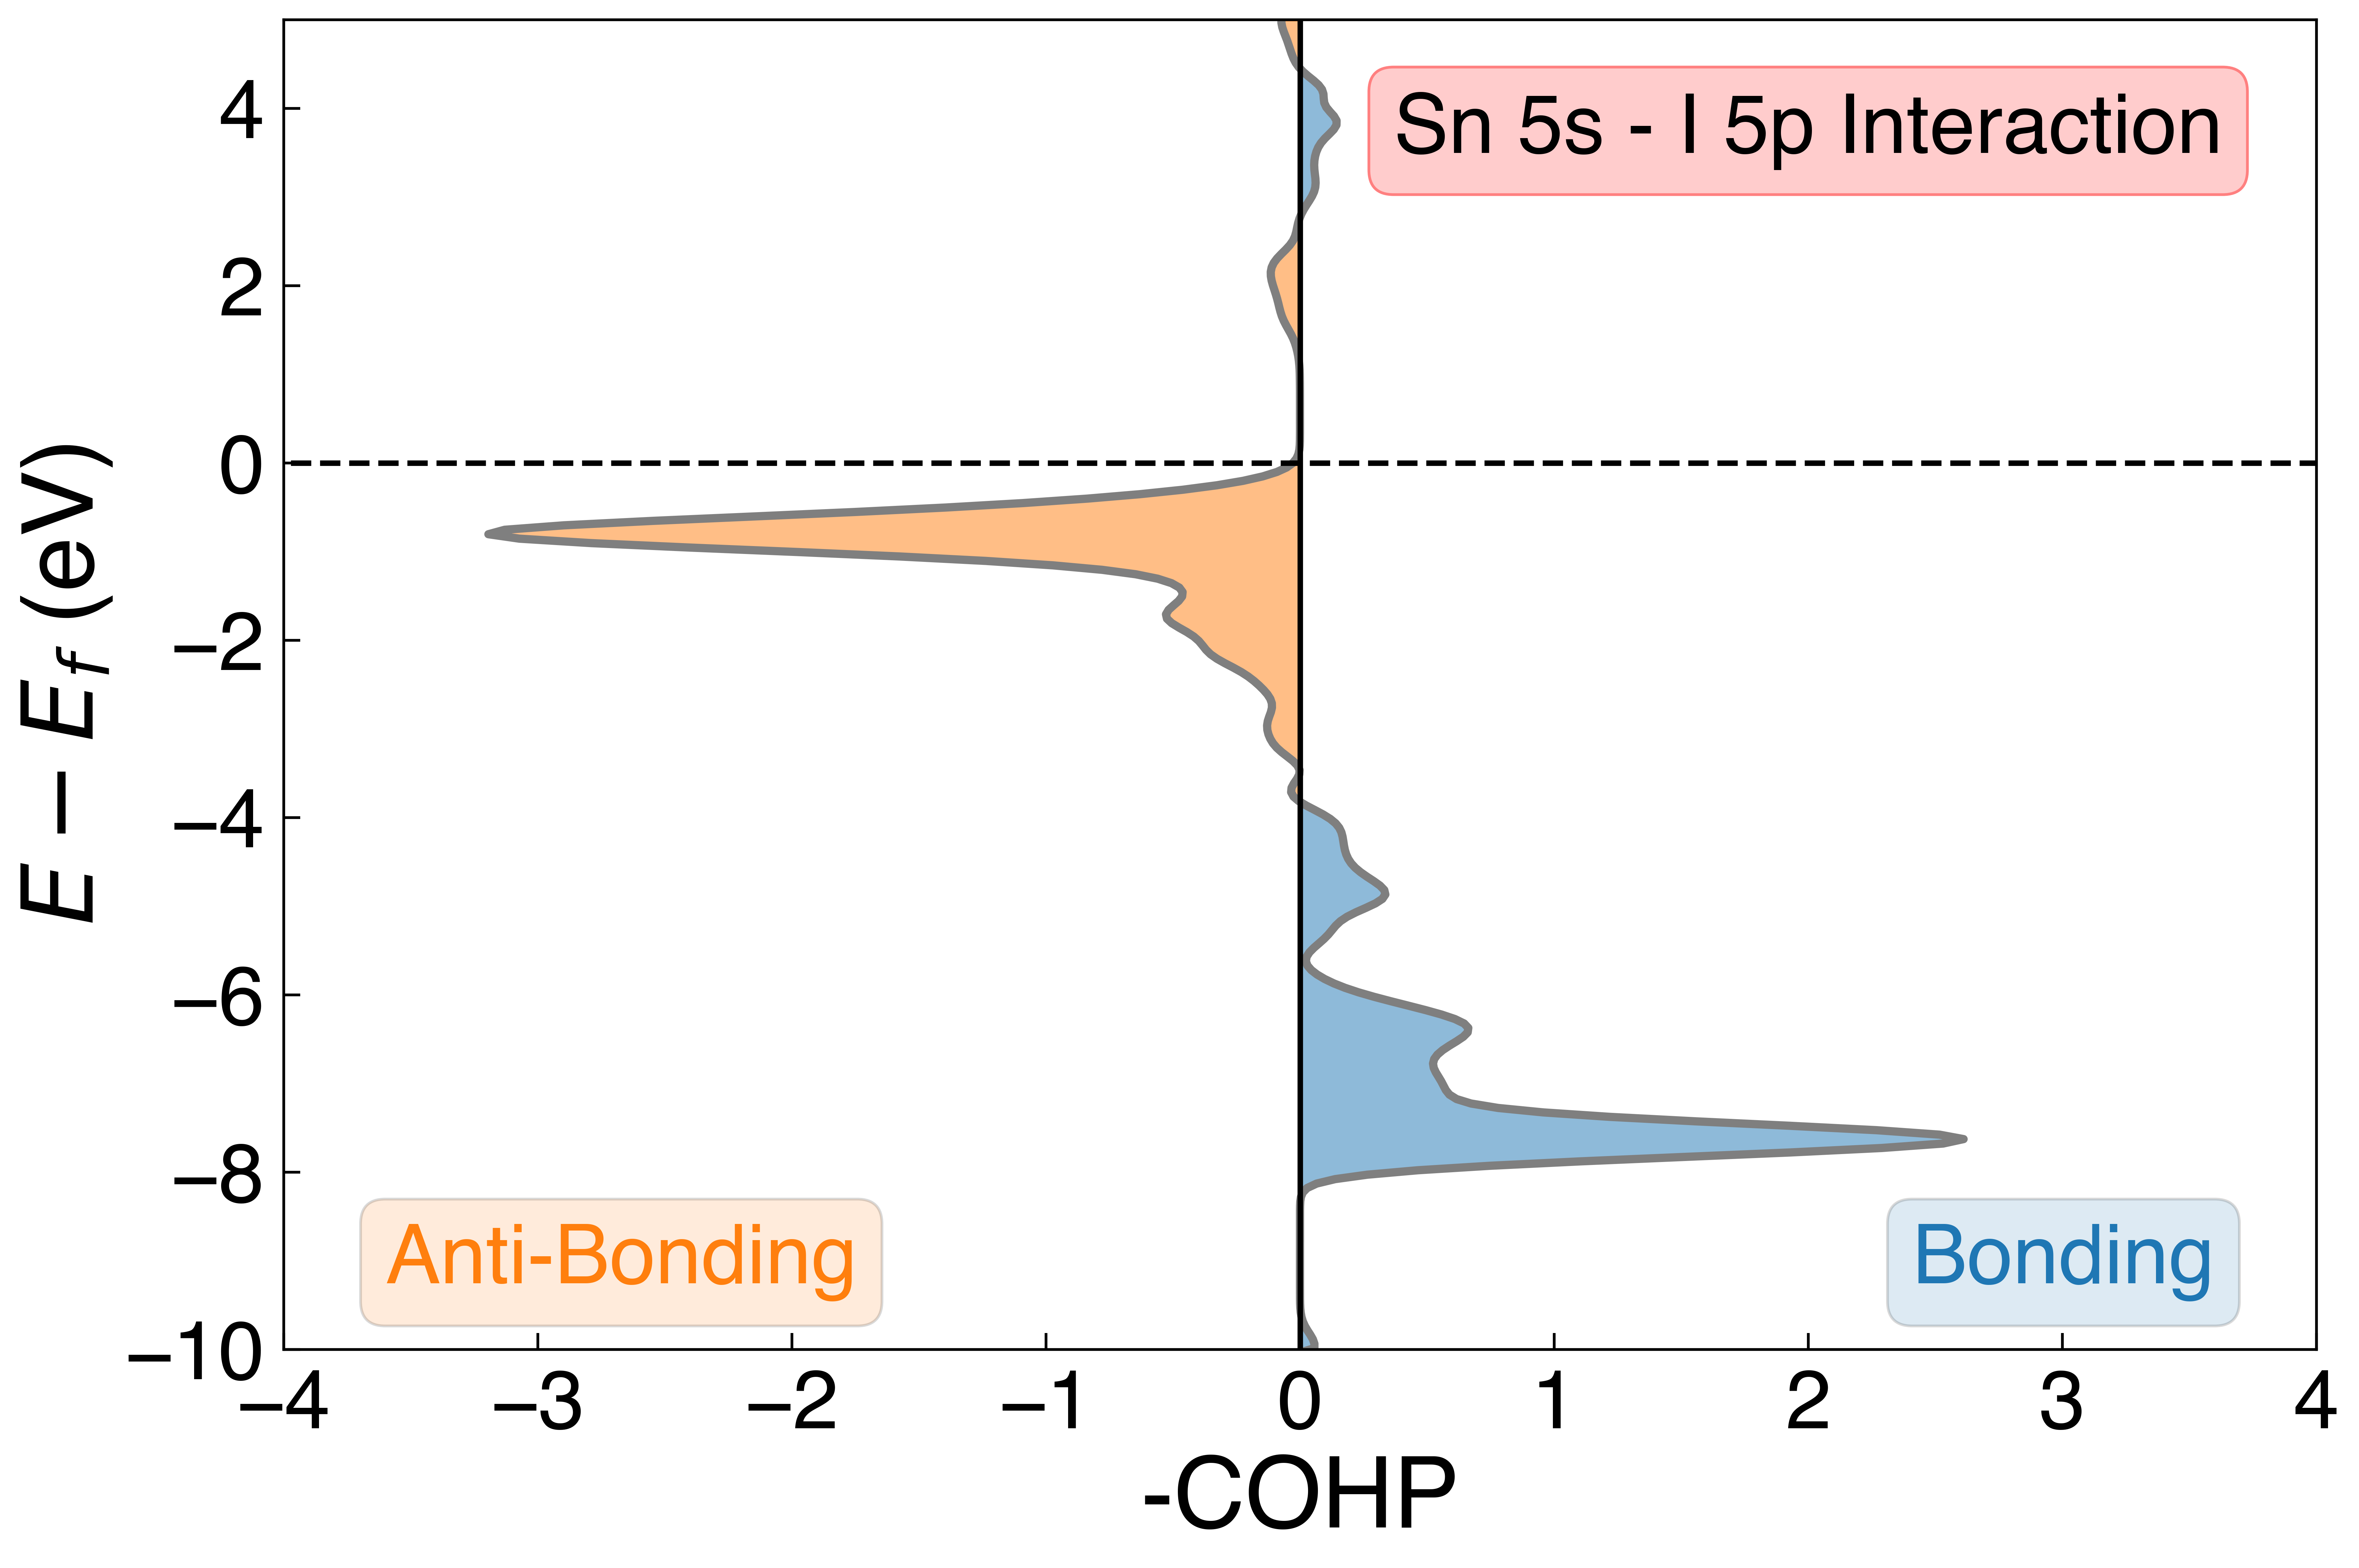

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

from pymatgen.electronic_structure.core import Orbital

#interaction between 5s and 5p
orb_list = []
for five_p_orb in [[5,Orbital.px], [5,Orbital.py], [5,Orbital.pz]]:
    orb_list.append([[5,Orbital.s], five_p_orb])

cp=CohpPlotter()
#cp.add_cohp(plotlabel,te_te_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
#    label_list=[label]*6, orbital_list=fives_fivep_orb_list))
label_list = []
for i in np.arange(1,15):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sn_I_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*14))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 5s - I 5p Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plot.set_xlim(-4,4)
plt.savefig("Cmc2_1_Lobster/Sn_5s_I_5p_COHP_PubStyle.pdf")

42


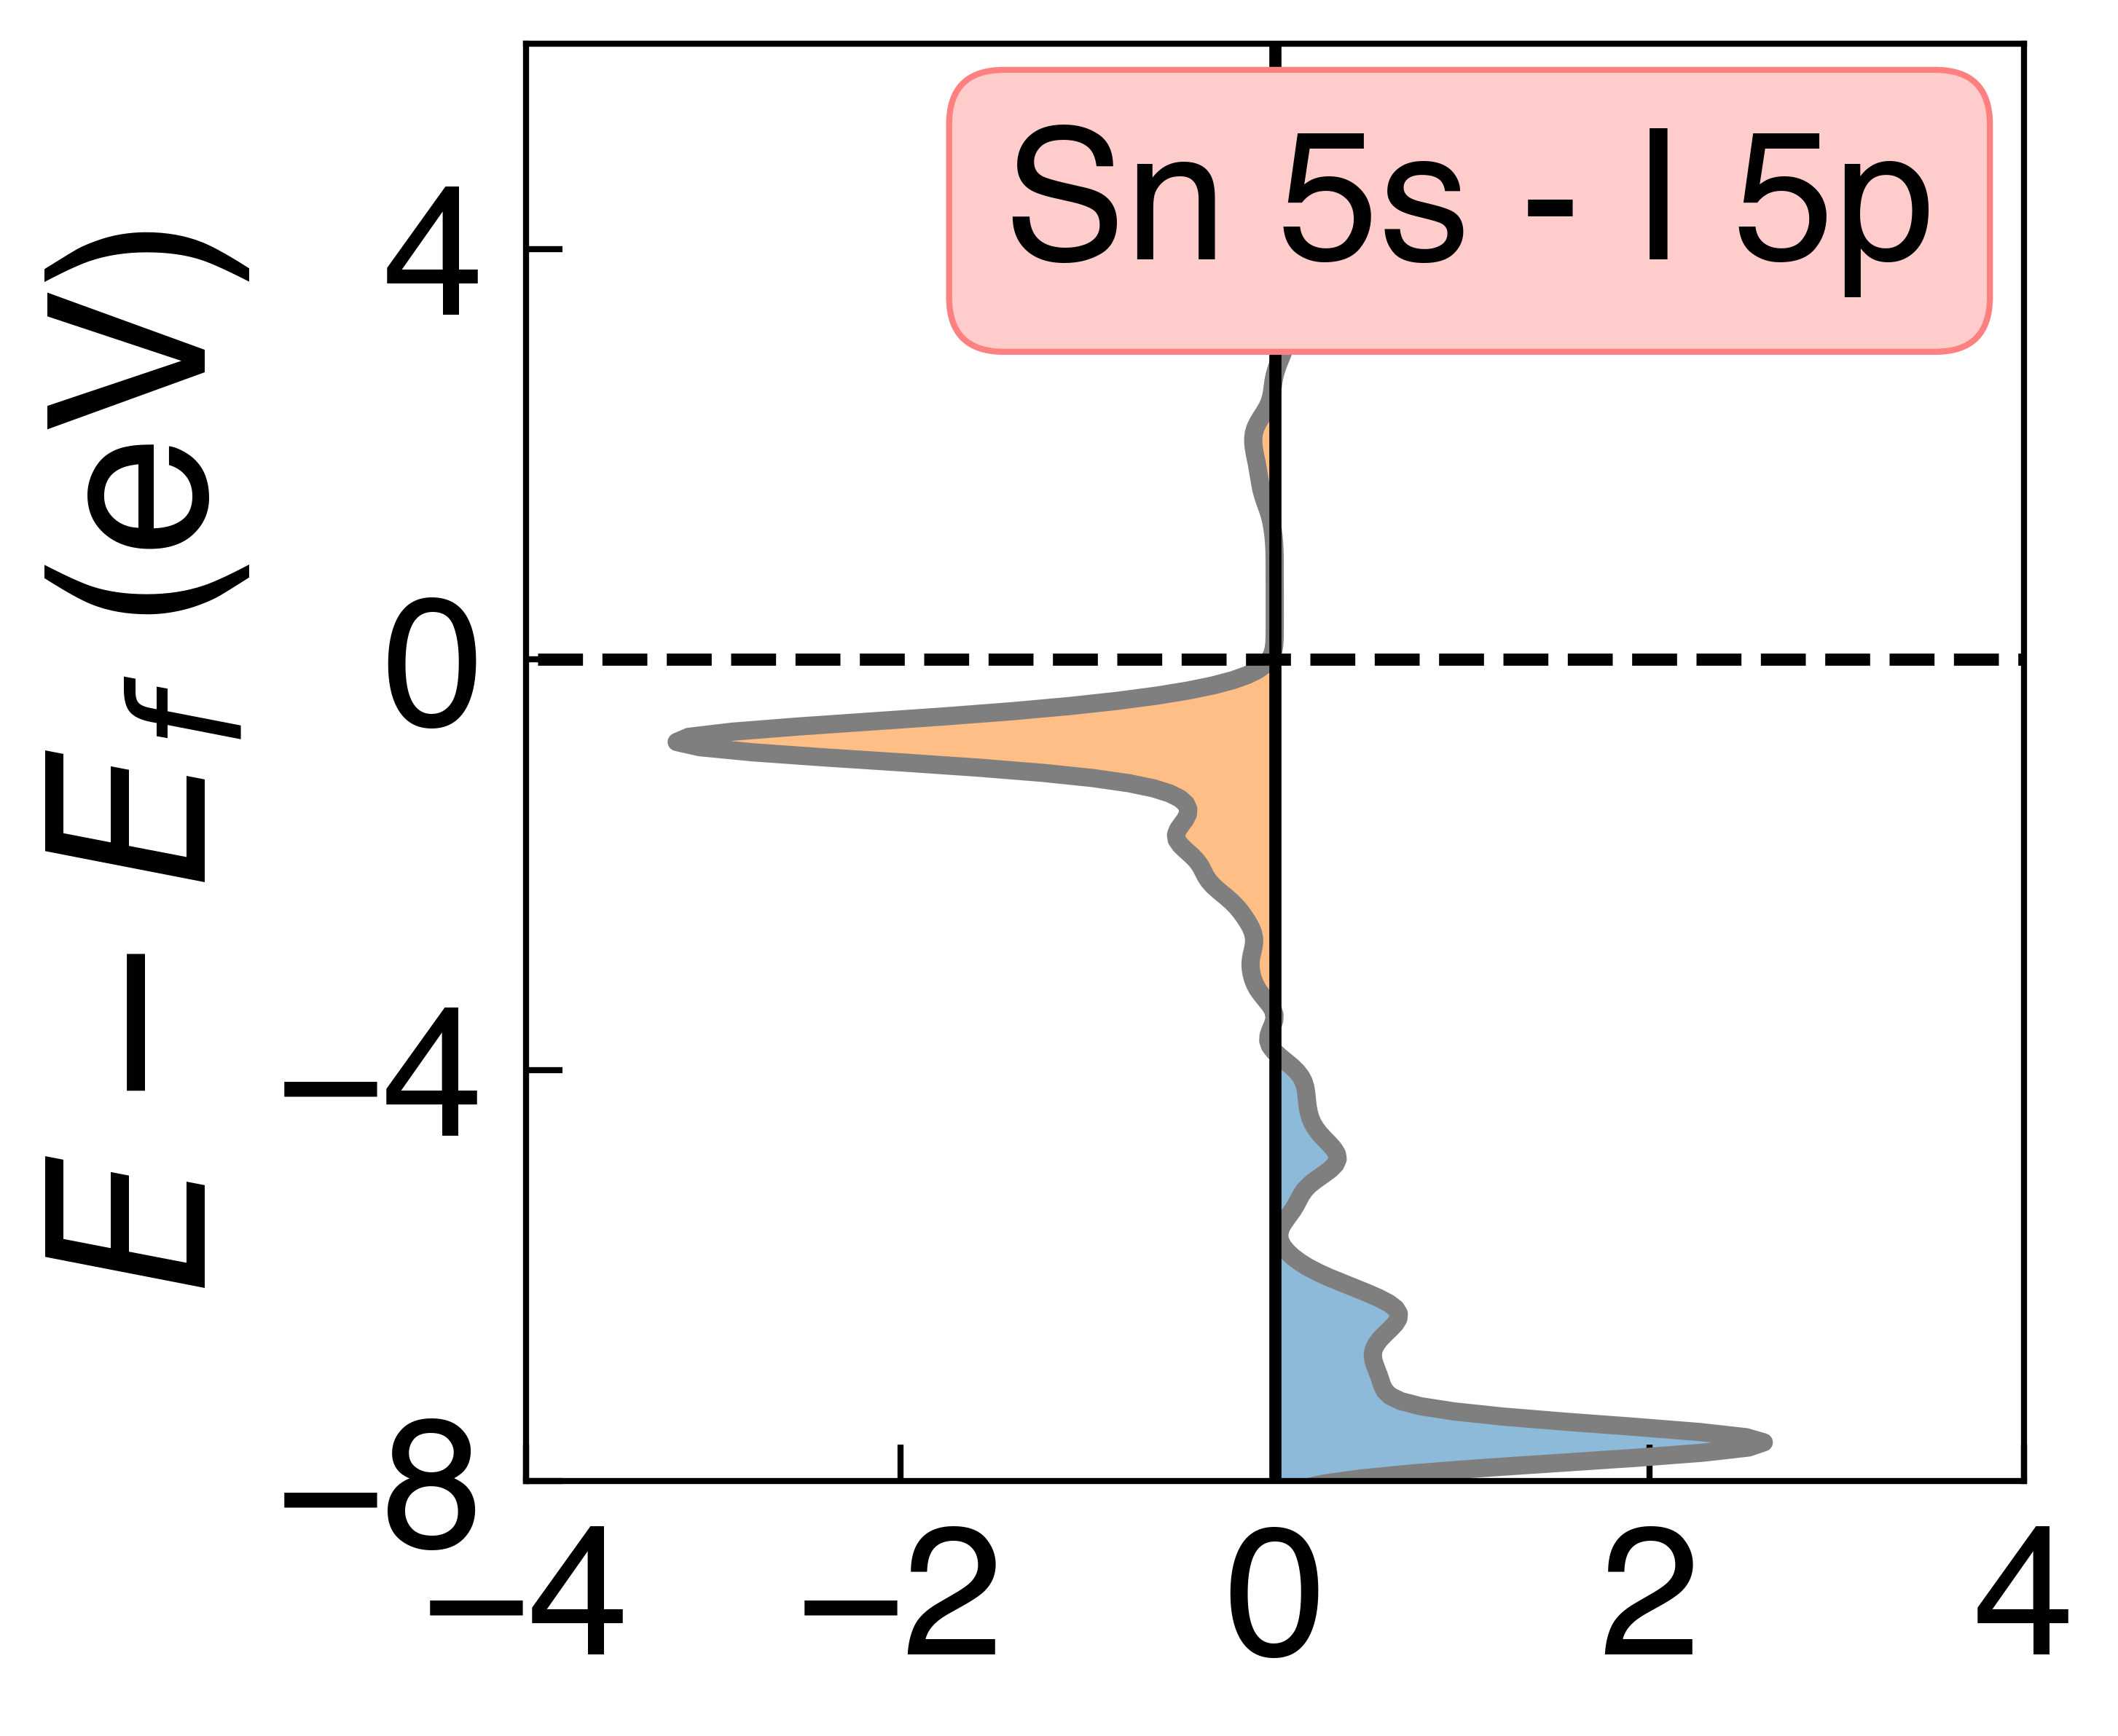

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

from pymatgen.electronic_structure.core import Orbital

#interaction between 5s and 5p
orb_list = []
for five_p_orb in [[5,Orbital.px], [5,Orbital.py], [5,Orbital.pz]]:
    orb_list.append([[5,Orbital.s], five_p_orb])

cp=CohpPlotter()
#cp.add_cohp(plotlabel,te_te_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
#    label_list=[label]*6, orbital_list=fives_fivep_orb_list))
label_list = []
for i in np.arange(1,15):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sn_I_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*14))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 6],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 5s - I 5p", ha="center", color="k", xy=(0.63, 0.85),
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
#plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
#                    xycoords='axes fraction', fontsize = 30,
#             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
#plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
#                    xycoords='axes fraction', fontsize = 30,
#             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plot.set_xlim(-4,4)


fig = plt.gcf()
fig.set_size_inches(4,4)
plot.set_ylim(-8,6)
plot.set_xticks([-4, -2, 0, 2, 4])
plot.set_yticks([-8, -4, 0, 4])
plot.set_xlabel("")

plt.savefig("Cmc2_1_Lobster/Sn_5s_I_5p_COHP_PubStyle_small.png", bbox_inches="tight")

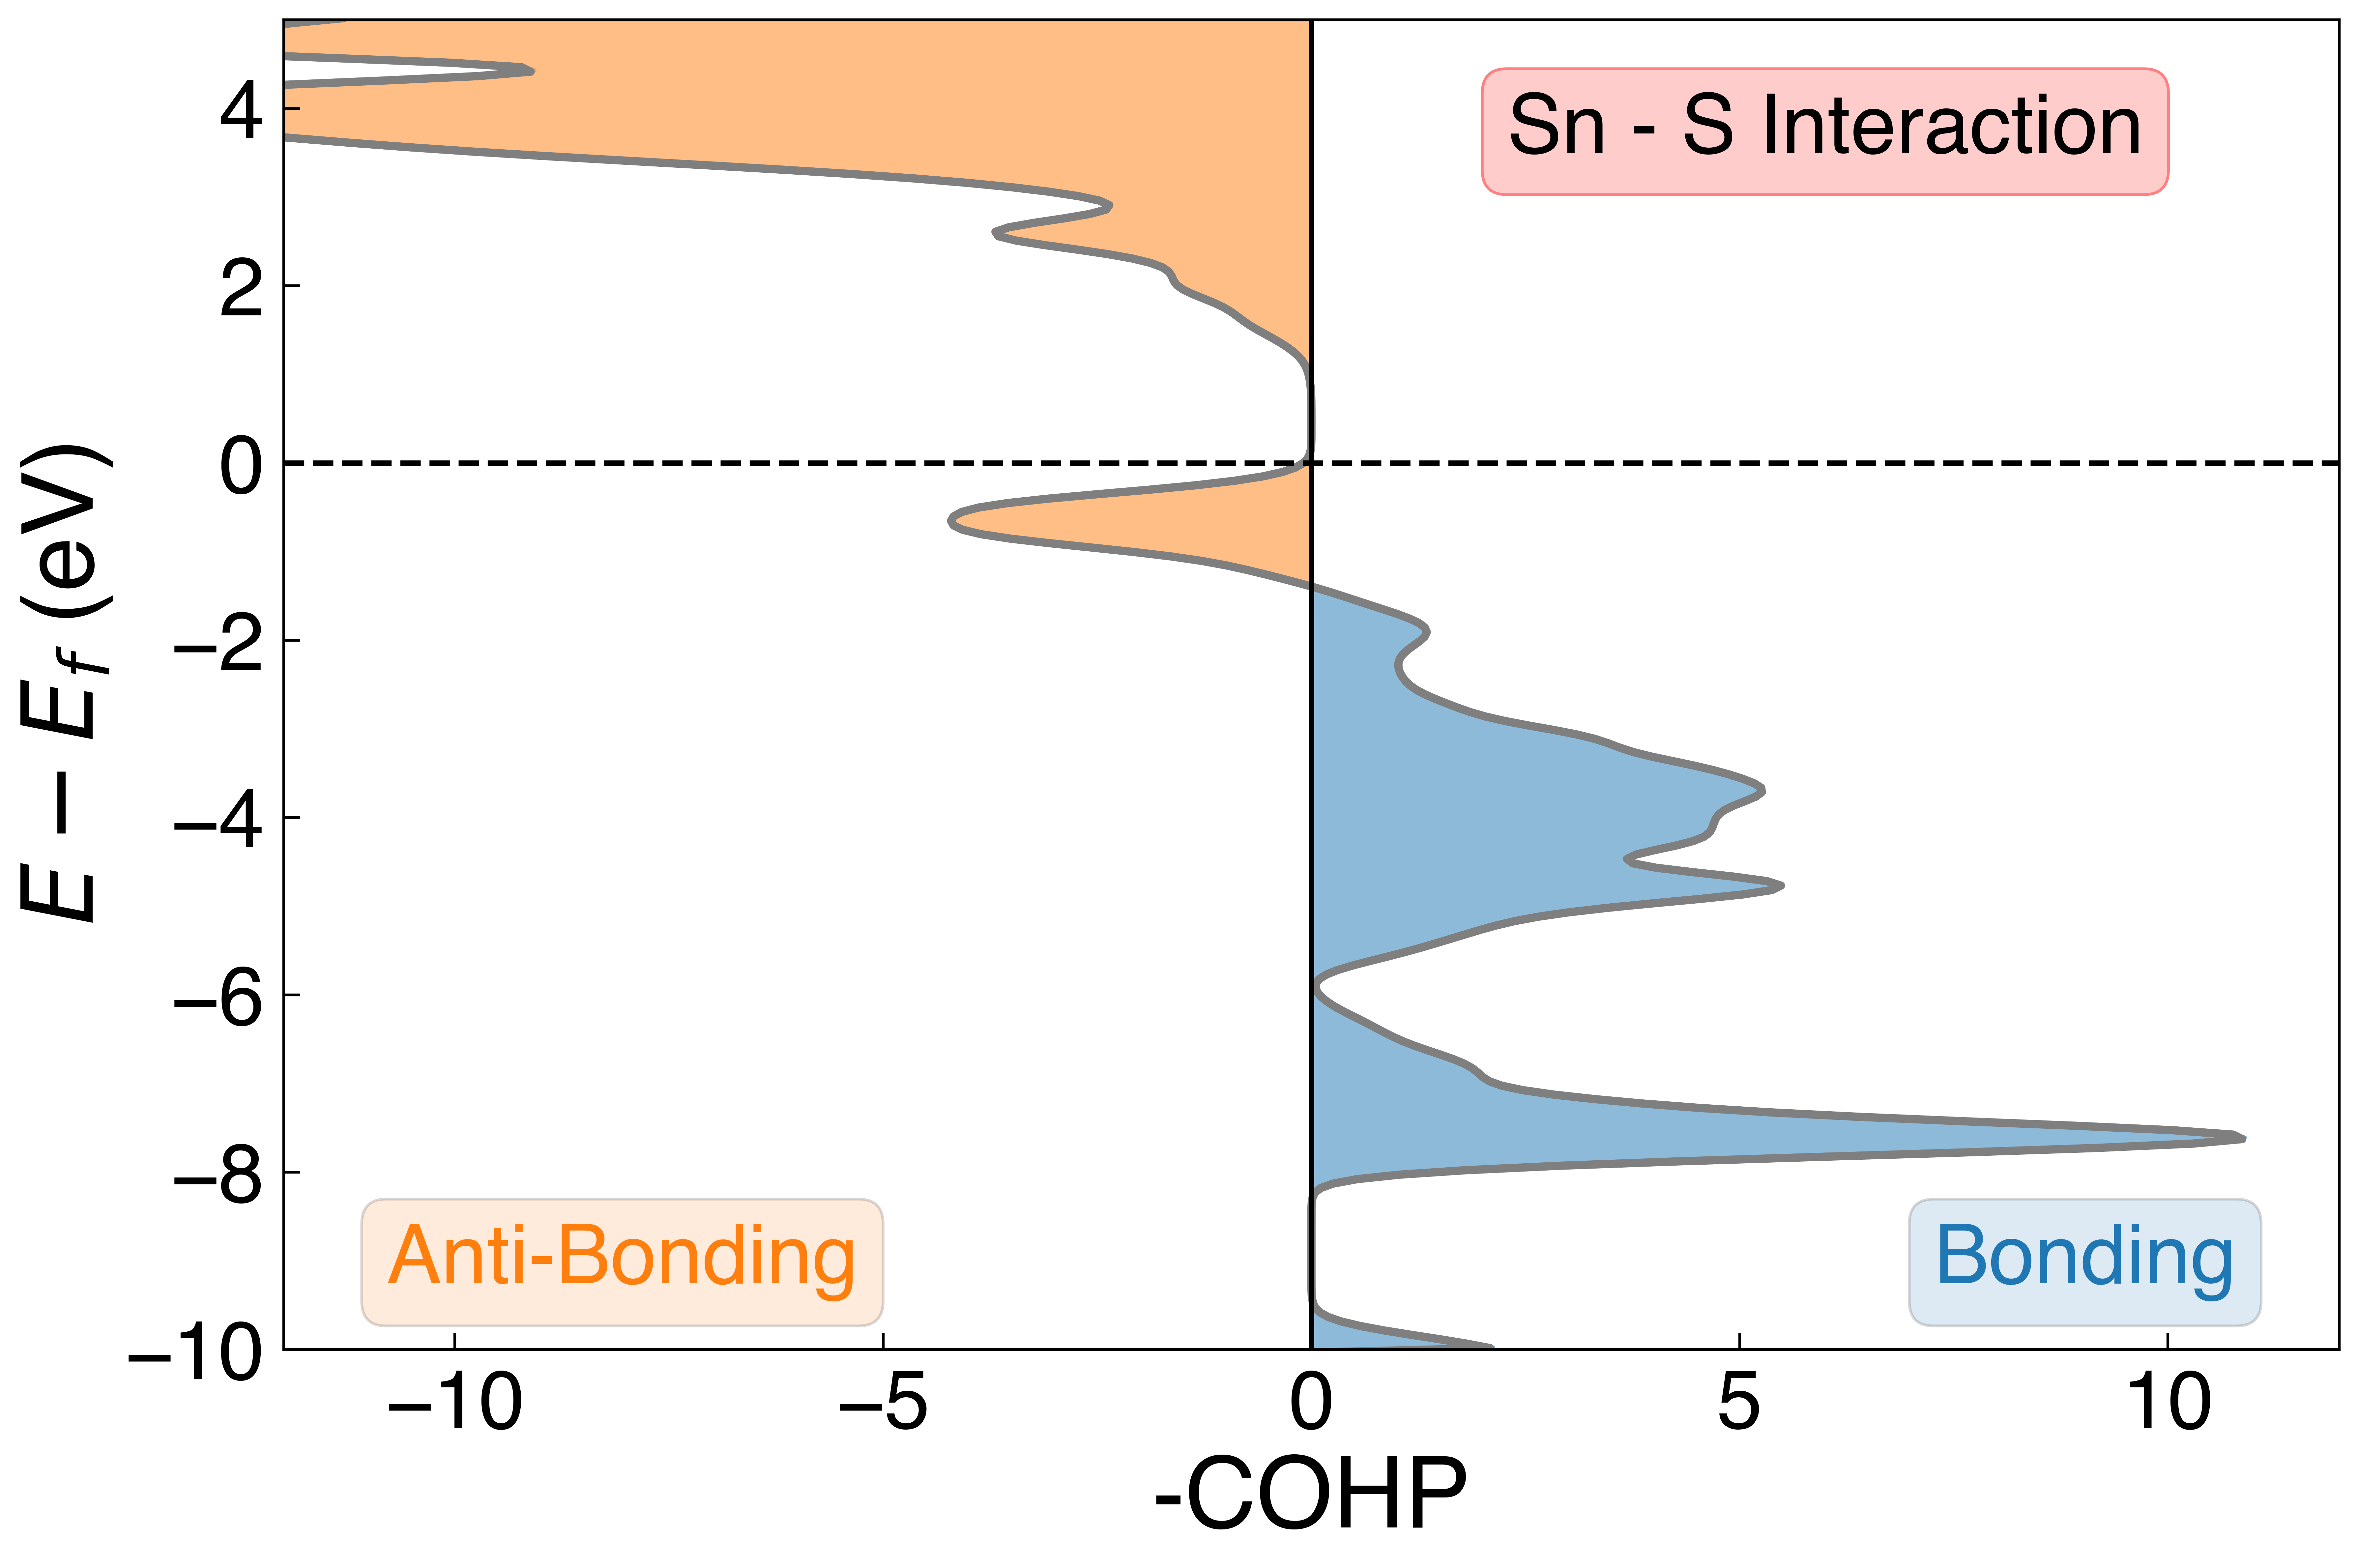

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

cp.add_cohp(plotlabel, Sn_S_orbital_proj_cohp.get_summed_cohp_by_label_list(
    [str(i) for i in np.arange(1,13)]))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-12,12],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn - S Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
#plot.set_xlim(-4,4)
plt.savefig("Cmc2_1_Lobster/Sn_S_COHP_PubStyle.pdf")

36


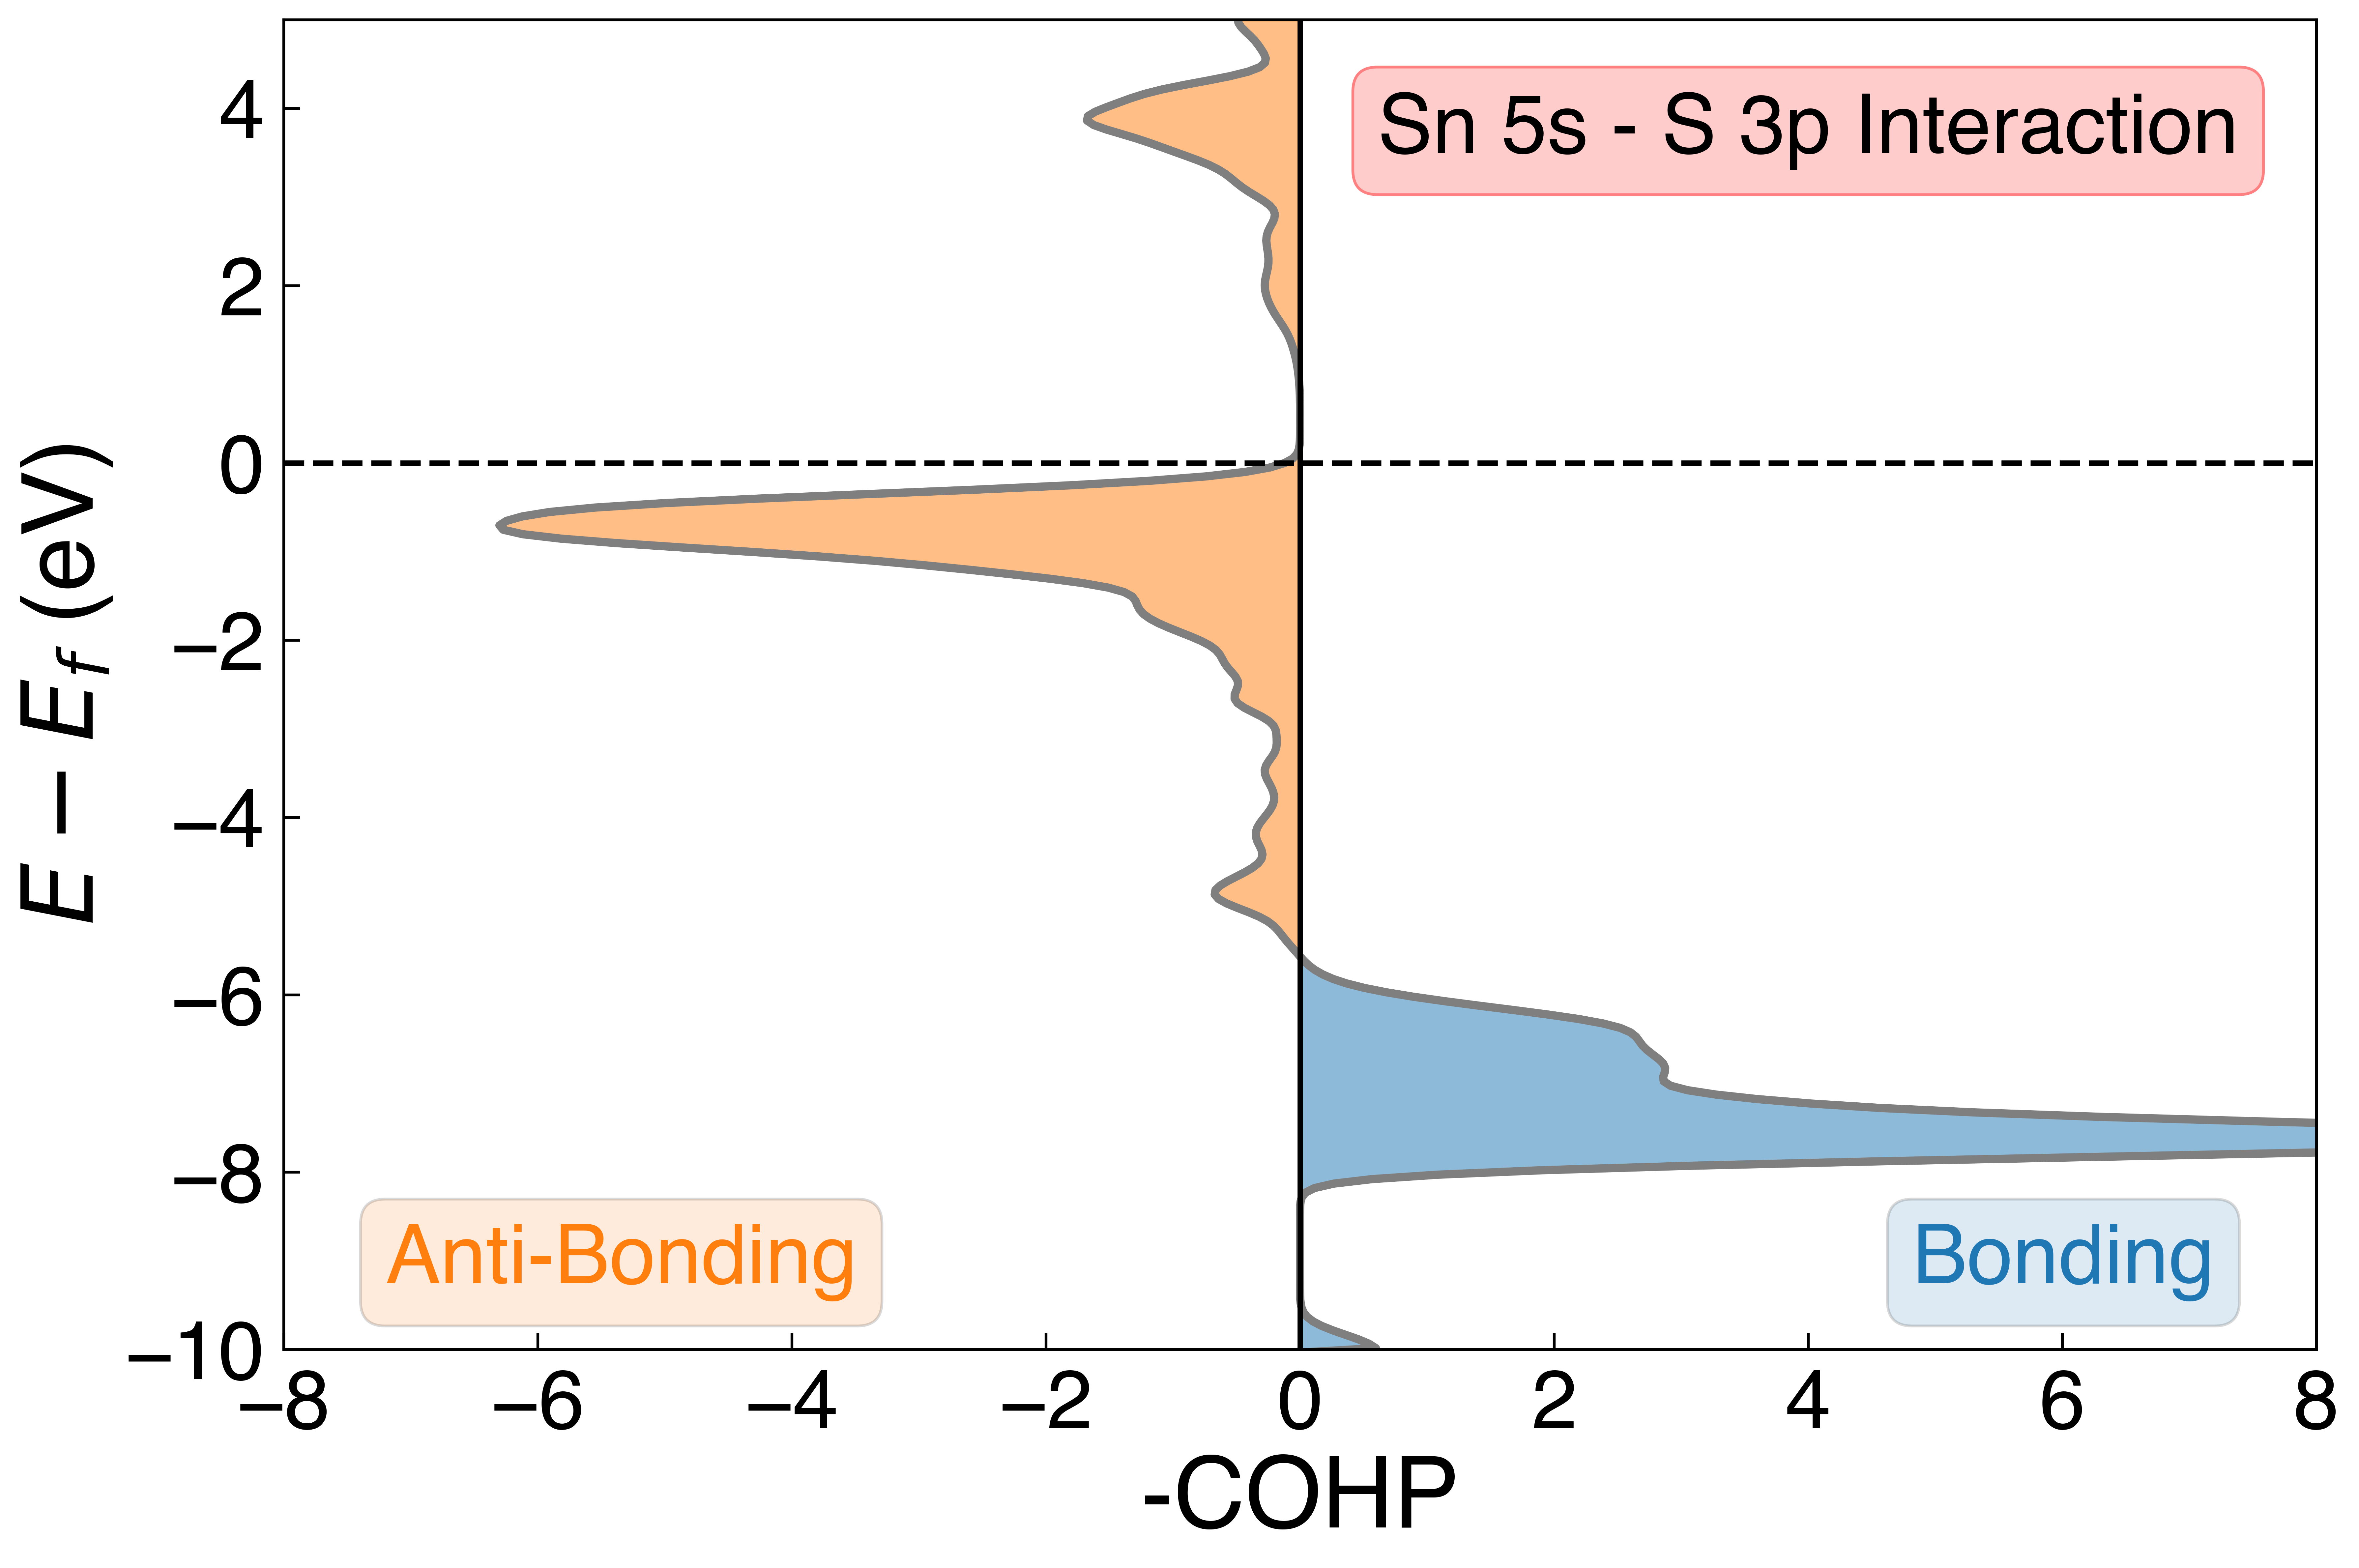

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

from pymatgen.electronic_structure.core import Orbital

#interaction between 5s and 3p
orb_list = []
for three_p_orb in [[3,Orbital.px], [3,Orbital.py], [3,Orbital.pz]]:
    orb_list.append([[5,Orbital.s], three_p_orb])

cp=CohpPlotter()
#cp.add_cohp(plotlabel,te_te_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
#    label_list=[label]*6, orbital_list=fives_fivep_orb_list))
label_list = []
for i in np.arange(1,13):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sn_S_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*12))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-8,8],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 5s - S 3p Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
#plot.set_xlim(-4,4)
plt.savefig("Cmc2_1_Lobster/Sn_5s_S_3p_COHP_PubStyle.pdf")

36


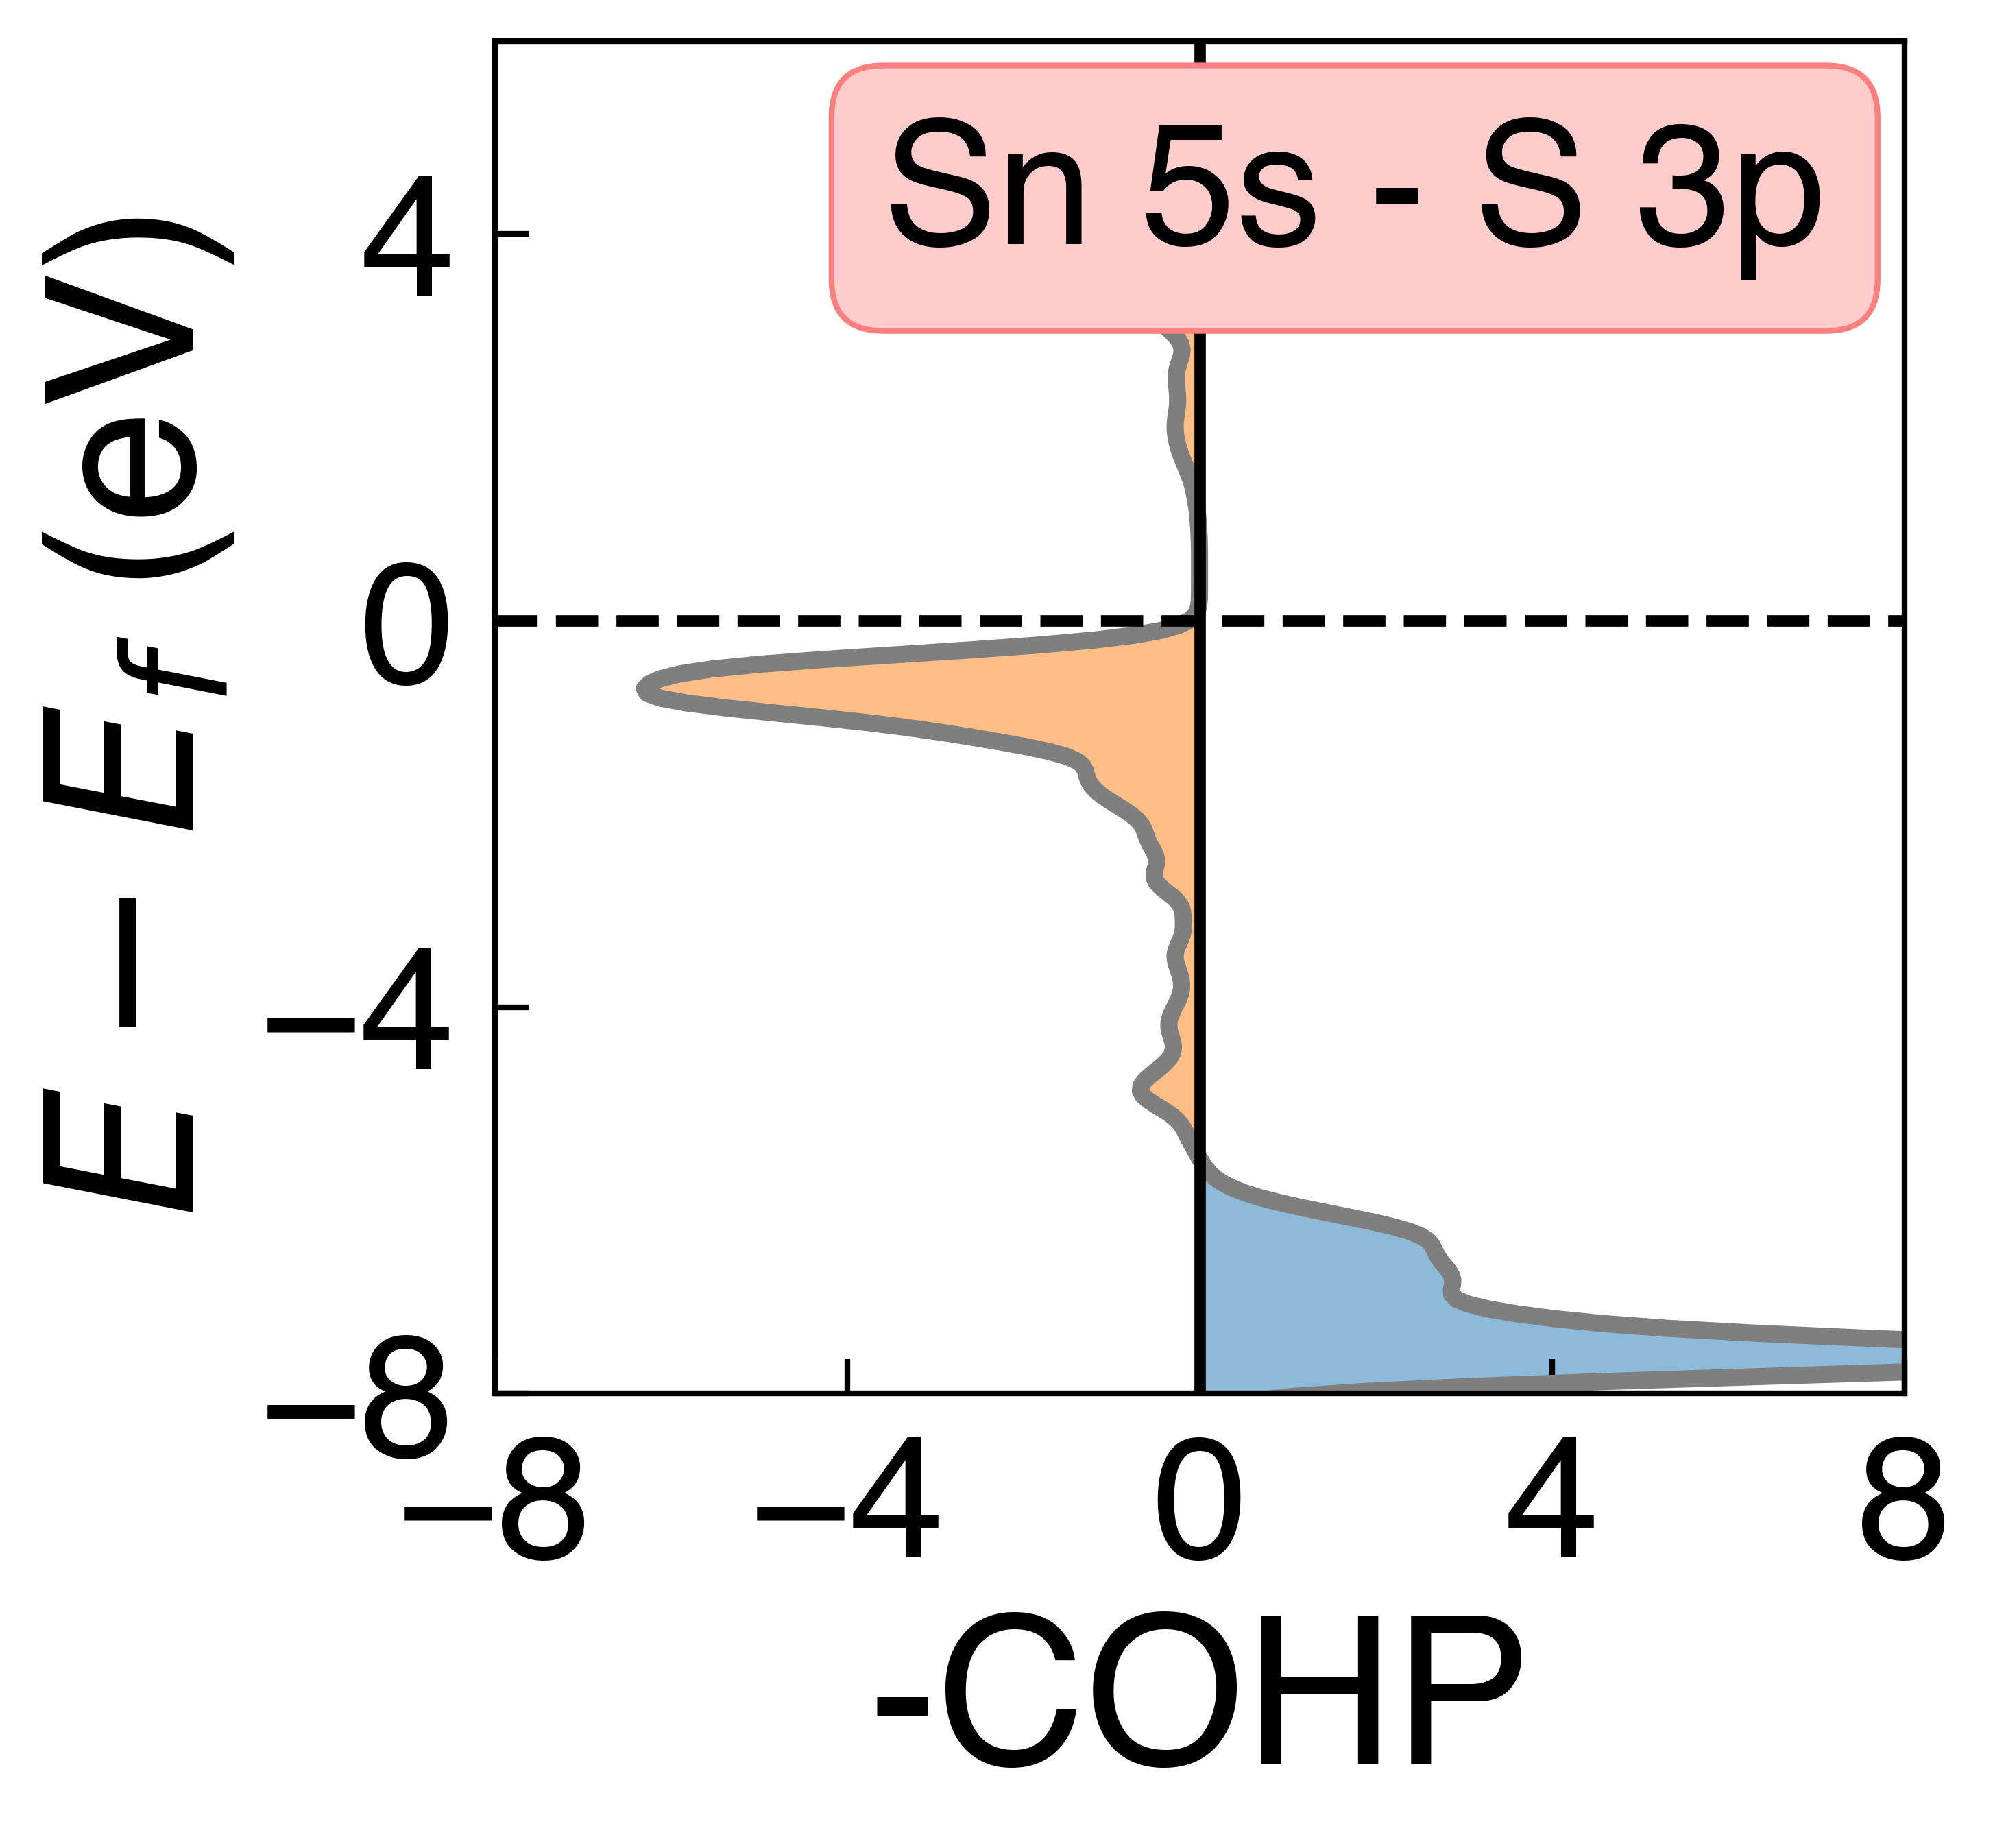

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

from pymatgen.electronic_structure.core import Orbital

#interaction between 5s and 3p
orb_list = []
for three_p_orb in [[3,Orbital.px], [3,Orbital.py], [3,Orbital.pz]]:
    orb_list.append([[5,Orbital.s], three_p_orb])

cp=CohpPlotter()
#cp.add_cohp(plotlabel,te_te_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
#    label_list=[label]*6, orbital_list=fives_fivep_orb_list))
label_list = []
for i in np.arange(1,13):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sn_S_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*12))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 6],xlim=[-8,8],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 5s - S 3p", ha="center", color="k", xy=(0.61, 0.85),
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
#plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
#                    xycoords='axes fraction', fontsize = 30,
#             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
#plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
#                    xycoords='axes fraction', fontsize = 30,
#             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plot.set_xlim(-8,8)


fig = plt.gcf()
fig.set_size_inches(4,4)
plot.set_ylim(-8,6)
plot.set_xticks([-8, -4, 0, 4, 8])
plot.set_yticks([-8, -4, 0, 4])
#plot.set_xlabel("")

plt.savefig("Cmc2_1_Lobster/Sn_5s_S_3p_COHP_PubStyle_small.png", bbox_inches="tight")

108


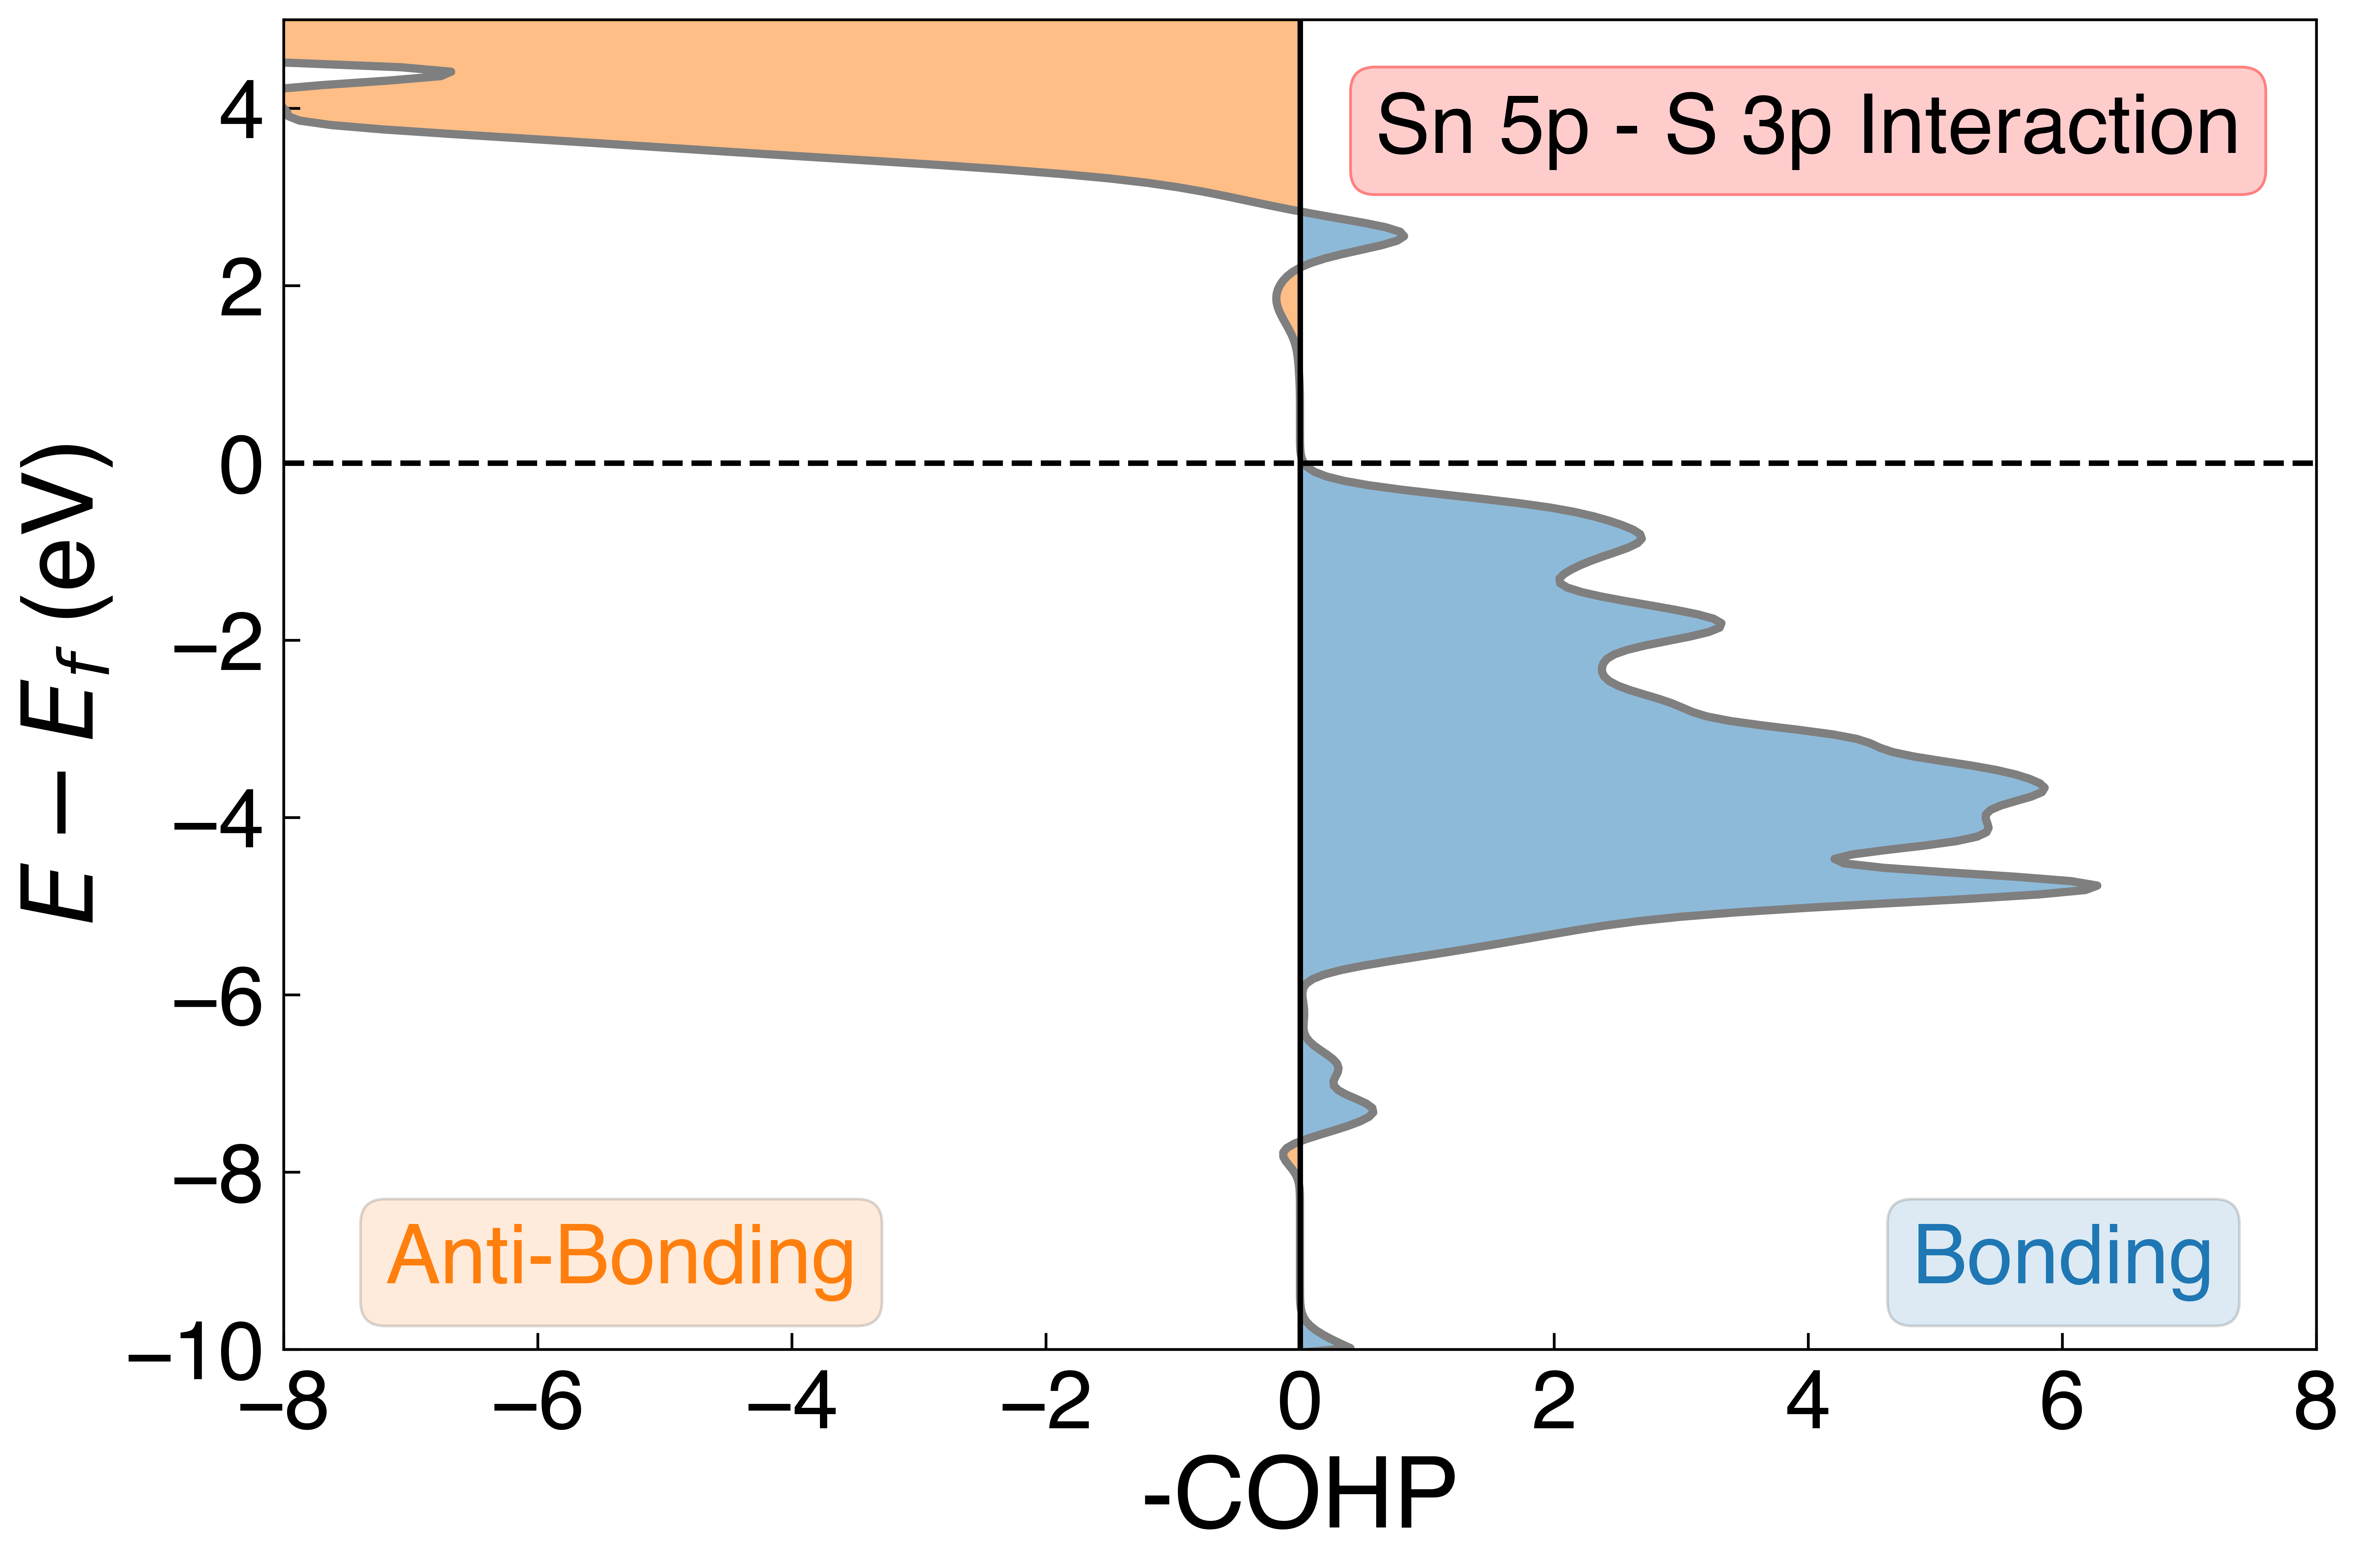

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np
import itertools

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
cp=CohpPlotter()
#get a nicer plot label

from pymatgen.electronic_structure.core import Orbital

orb_list = []
three_p_orbs = [[3,Orbital.px], [3,Orbital.py], [3,Orbital.pz]]
five_p_orbs = [[5,Orbital.px], [5,Orbital.py], [5,Orbital.pz]]

for five_p_orb in five_p_orbs:
    for three_p_orb in three_p_orbs:
        orb_list.append([five_p_orb, three_p_orb])

cp=CohpPlotter()
label_list = []
for i in np.arange(1,13):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
cp.add_cohp(plotlabel, Sn_S_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*12))
print(len(label_list))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-8,8],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 5p - S 3p Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
#plot.set_xlim(-4,4)
plt.savefig("Cmc2_1_Lobster/Sn_5p_S_3p_COHP_PubStyle.pdf")

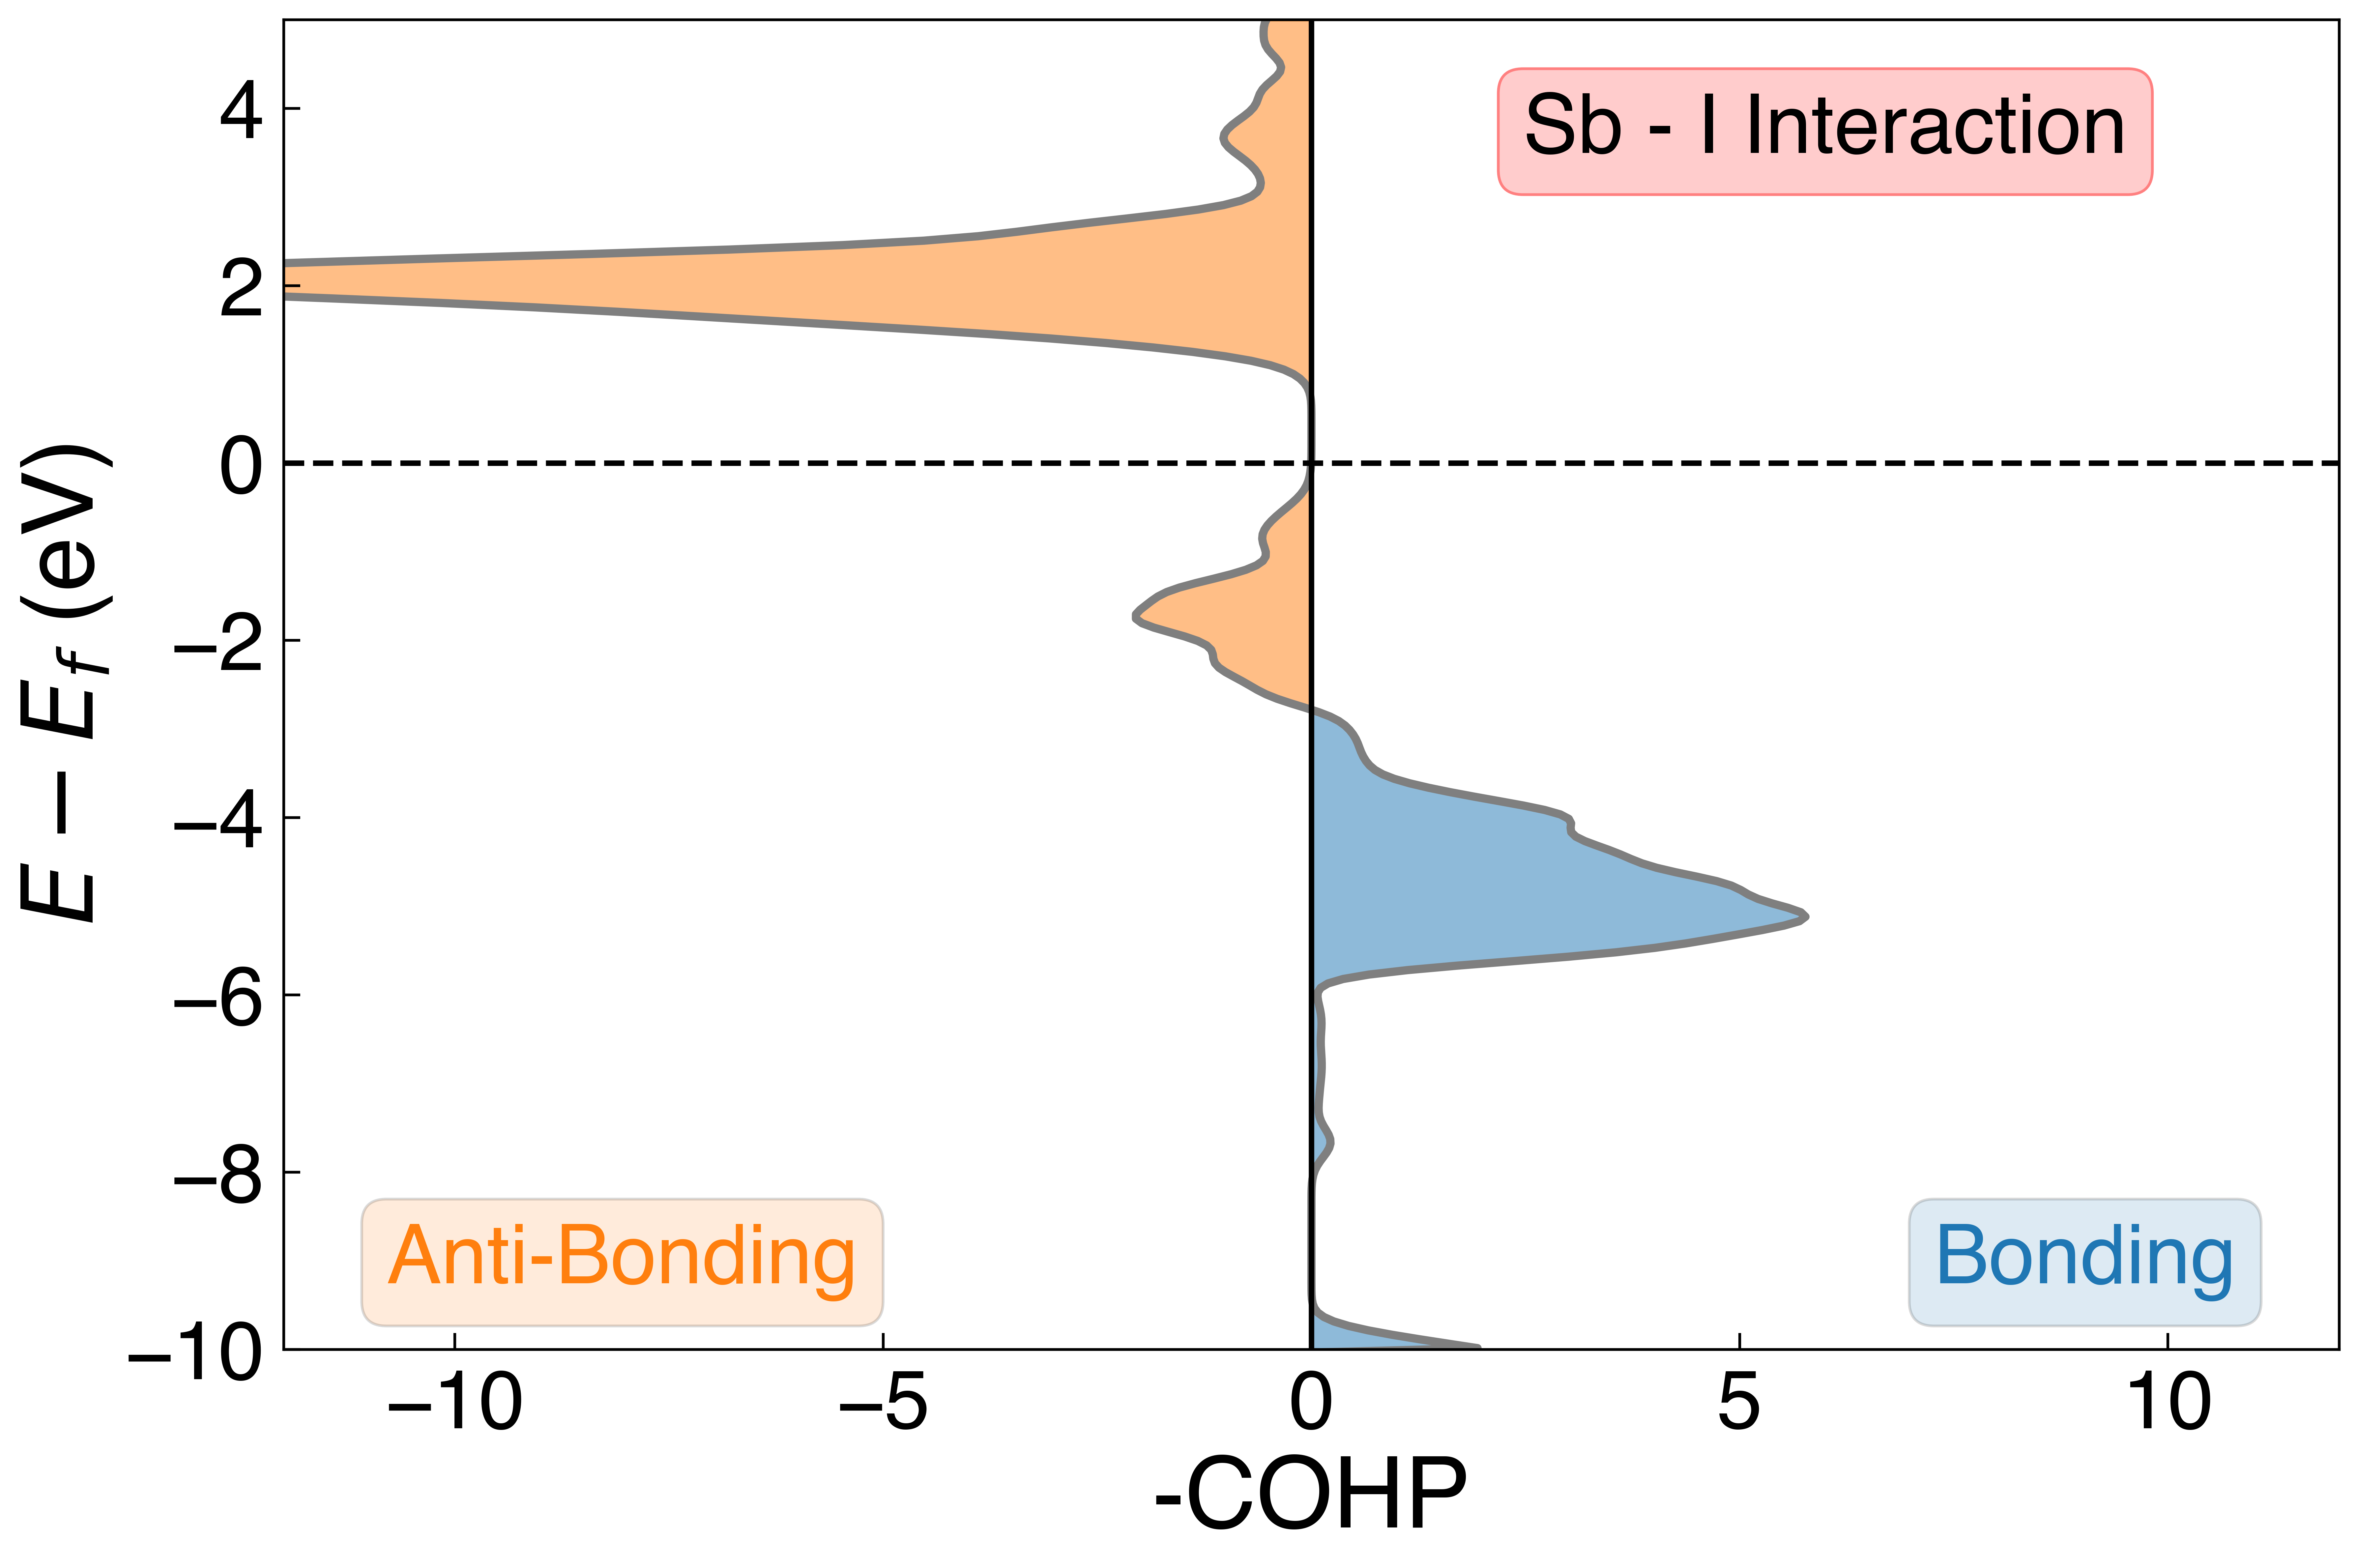

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

cp.add_cohp(plotlabel, Sb_I_orbital_proj_cohp.get_summed_cohp_by_label_list(
    [str(i) for i in np.arange(1,9)]))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-12,12],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sb - I Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
#plot.set_xlim(-4,4)
plt.savefig("Cmc2_1_Lobster/Sb_I_COHP_PubStyle.pdf")

24


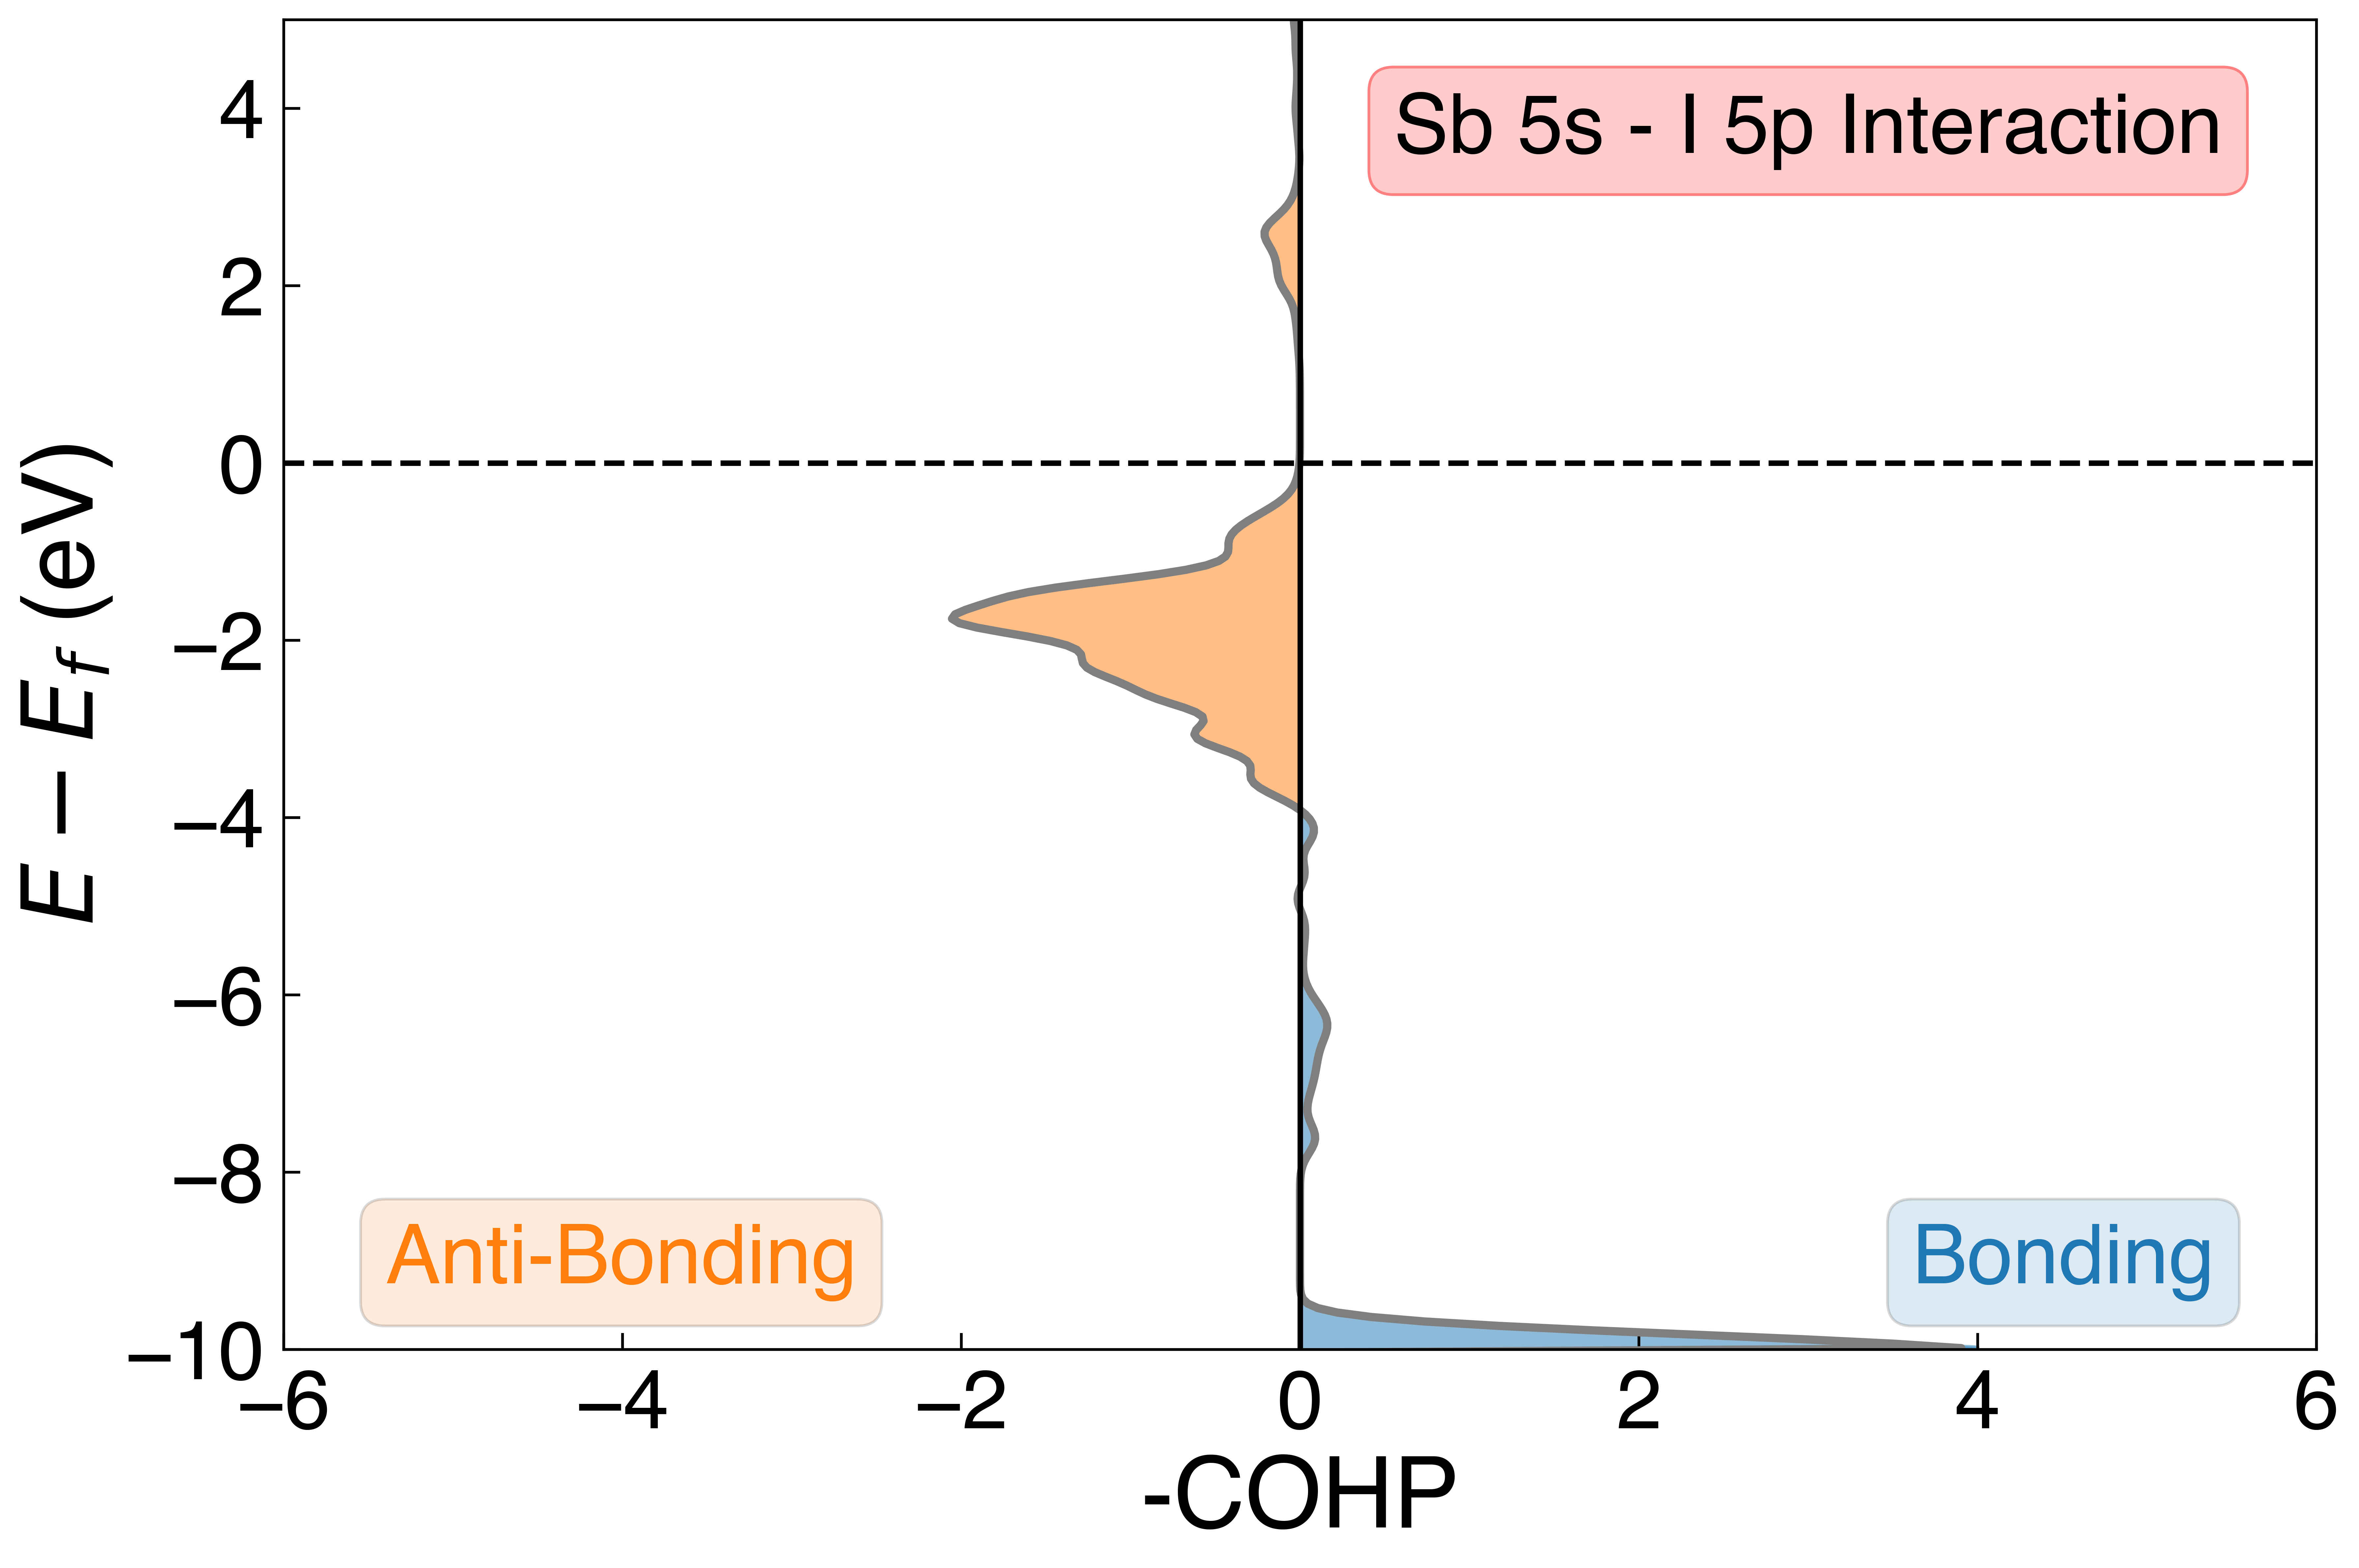

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label

from pymatgen.electronic_structure.core import Orbital

#interaction between 5s and 5p
orb_list = []
for five_p_orb in [[5,Orbital.px], [5,Orbital.py], [5,Orbital.pz]]:
    orb_list.append([[5,Orbital.s], five_p_orb])

cp=CohpPlotter()
label_list = []
for i in np.arange(1,9):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sb_I_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*8))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sb 5s - I 5p Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
#plot.set_xlim(-4,4)
plt.savefig("Cmc2_1_Lobster/Sb_5s_I_5p_COHP_PubStyle.pdf")

Note differences in x-axes!

## Sn - I Interaction

In [26]:
!cat Cmc2_1_Lobster/Sn_I_upto4_ICOHPLIST.lobster

  COHP#  atomMU  atomNU     distance     translation      ICOHP (at) eF   for spin  1
      1     Sn1     I14      3.16760      -1   0   0           -1.71353 
      2     Sn1     I14      3.16760       0   1   0           -1.71366 
      3     Sn2     I12      3.52437       0   0   0           -0.66395 
      4     Sn2     I13      3.73428       0  -1   0           -0.39633 
      5     Sn2     I13      3.73428       1   0   0           -0.39645 
      6     Sn2     I14      3.74307       0  -1   0           -0.34409 
      7     Sn2     I14      3.74307       1   0   0           -0.34456 
      8     Sn3     I11      3.52437       0   0   0           -0.66260 
      9     Sn3     I15      3.74307      -1   0   0           -0.34493 
     10     Sn3     I15      3.74307       0   1   0           -0.34453 
     11     Sn3     I16      3.73428      -1   0   1           -0.39657 
     12     Sn3     I16      3.73428       0   1   1           -0.39647 
     13     Sn4     I15      3.16760  

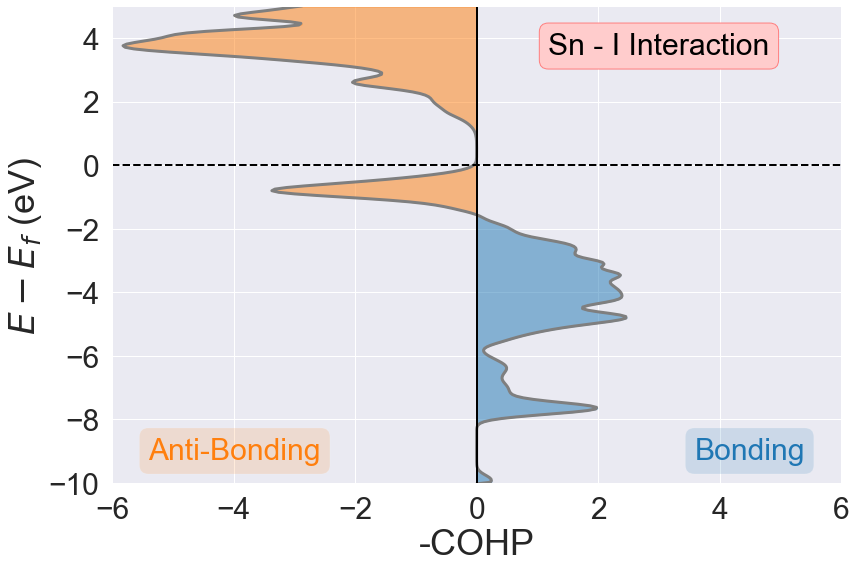

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

cp.add_cohp(plotlabel, Sn_I_orbital_proj_cohp.get_summed_cohp_by_label_list(
    [str(i) for i in np.arange(1,15)]))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn - I Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sn_I_Total_COHP.pdf", bbox_inches="tight")

Should be 504 orbital interactions between Sn (4d, 5s, 5p) and I (5s, 5p) (according to the length of `Sn_I_upto4_COHPCAR.lobster`)

In [26]:
# 9 Sn orbitals, 4 atoms, 2 coordinated to 2, 2 to 5
# 4 I orbitals, 6 atoms
9*4*2*7 # Yep, checks out

504

In [27]:
42+126+210+14+42+70

504

42


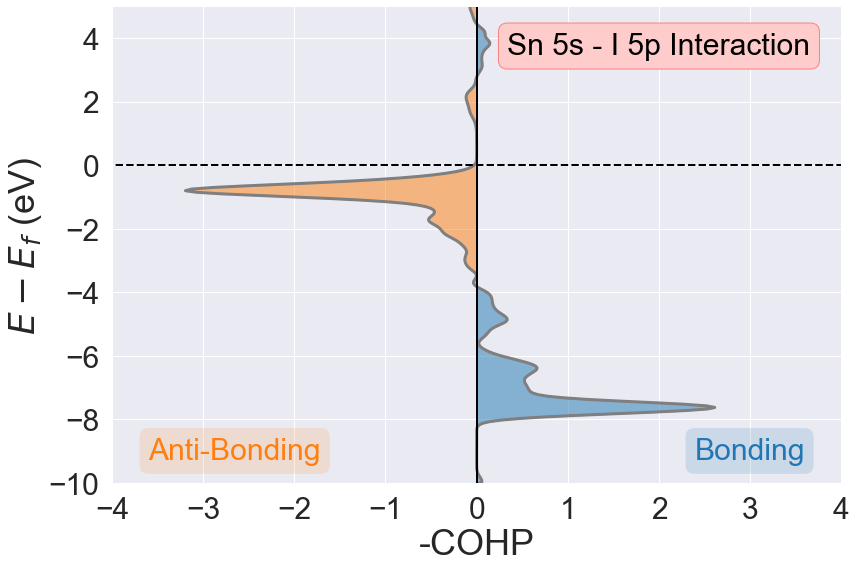

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

from pymatgen.electronic_structure.core import Orbital

#interaction between 5s and 5p
orb_list = []
for five_p_orb in [[5,Orbital.px], [5,Orbital.py], [5,Orbital.pz]]:
    orb_list.append([[5,Orbital.s], five_p_orb])

cp=CohpPlotter()
#cp.add_cohp(plotlabel,te_te_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
#    label_list=[label]*6, orbital_list=fives_fivep_orb_list))
label_list = []
for i in np.arange(1,15):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sn_I_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*14))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 5s - I 5p Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plot.set_xlim(-4,4)
plt.savefig("Cmc2_1_Lobster/Sn_5s_I_5p_COHP.pdf")

126


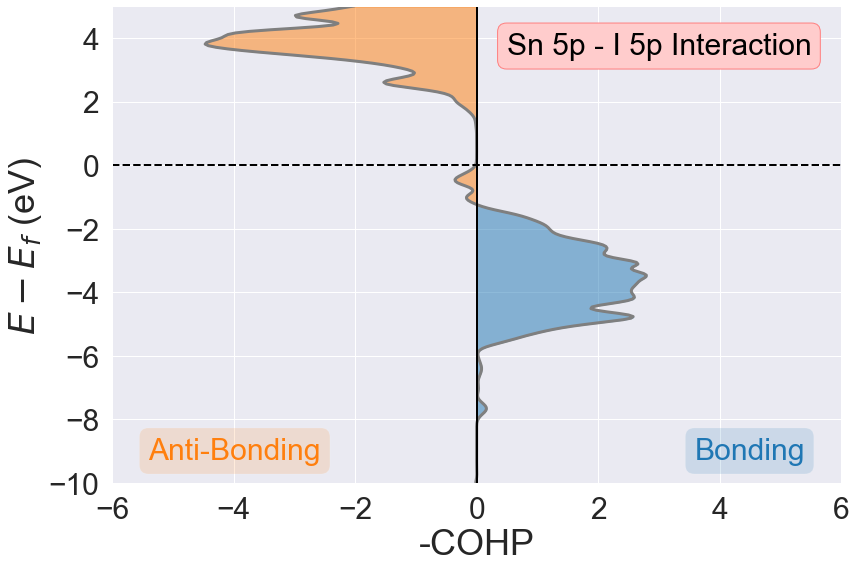

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np
import itertools

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
cp=CohpPlotter()
#get a nicer plot label

from pymatgen.electronic_structure.core import Orbital

#interaction between 5p and 5p
#interaction between 5p and 5p
orb_list = []
five_p_orbs = [[5,Orbital.px], [5,Orbital.py], [5,Orbital.pz]]

for i in itertools.product(five_p_orbs, repeat=2):
    orb_list.append(i) 

cp=CohpPlotter()
label_list = []
for i in np.arange(1,15):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
cp.add_cohp(plotlabel, Sn_I_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*14))
print(len(label_list))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 5p - I 5p Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sn_5p_I_5p_COHP.pdf")

210


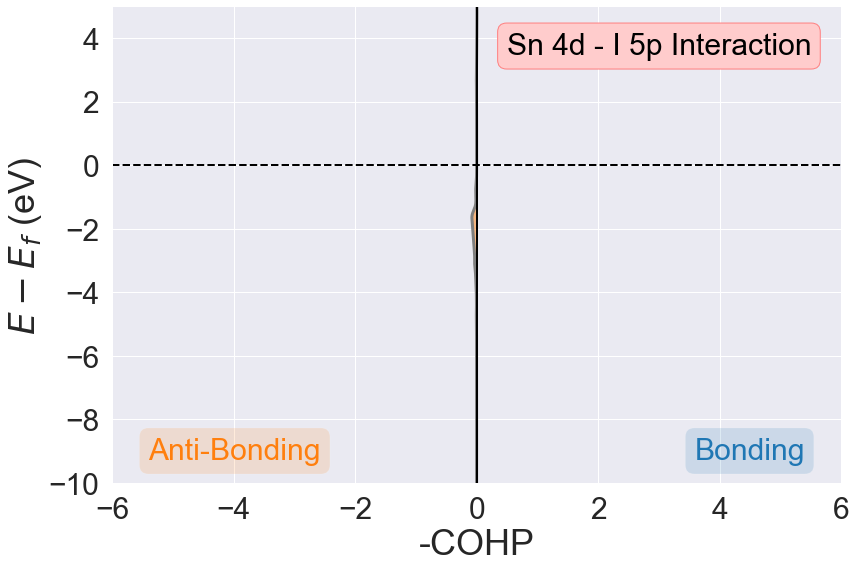

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)

cp=CohpPlotter()
#get a nicer plot label

from pymatgen.electronic_structure.core import Orbital
    
orb_list = []
five_p_orbs = [[5,Orbital.px], [5,Orbital.py], [5,Orbital.pz]]
four_d_orbs = [[4,Orbital.dx2], [4,Orbital.dxy], [4,Orbital.dxz], 
               [4,Orbital.dyz], [4,Orbital.dz2]]
for five_p_orb in five_p_orbs:
    for four_d_orb in four_d_orbs:
        orb_list.append([four_d_orb, five_p_orb])

cp=CohpPlotter()
#cp.add_cohp(plotlabel,te_te_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
#    label_list=[label]*6, orbital_list=fives_fivep_orb_list))
label_list = []
for i in np.arange(1,15):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sn_I_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*14))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 4d - I 5p Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sn_4d_I_5p_COHP.pdf")

14


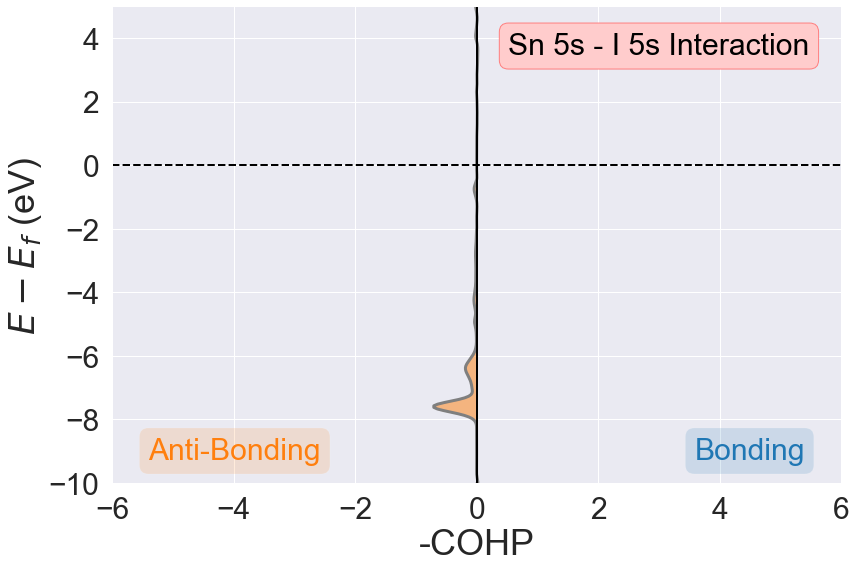

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)

cp=CohpPlotter()
#get a nicer plot label

from pymatgen.electronic_structure.core import Orbital

#interaction between 5s and 5p
orb_list = []
orb_list.append([[5,Orbital.s], [5,Orbital.s]])
#orb_list.append([[5,Orbital.s], [5,Orbital.s]])

cp=CohpPlotter()
label_list = []
for i in np.arange(1,15):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sn_I_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*14))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 5s - I 5s Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sn_5s_I_5s_COHP.pdf")

42


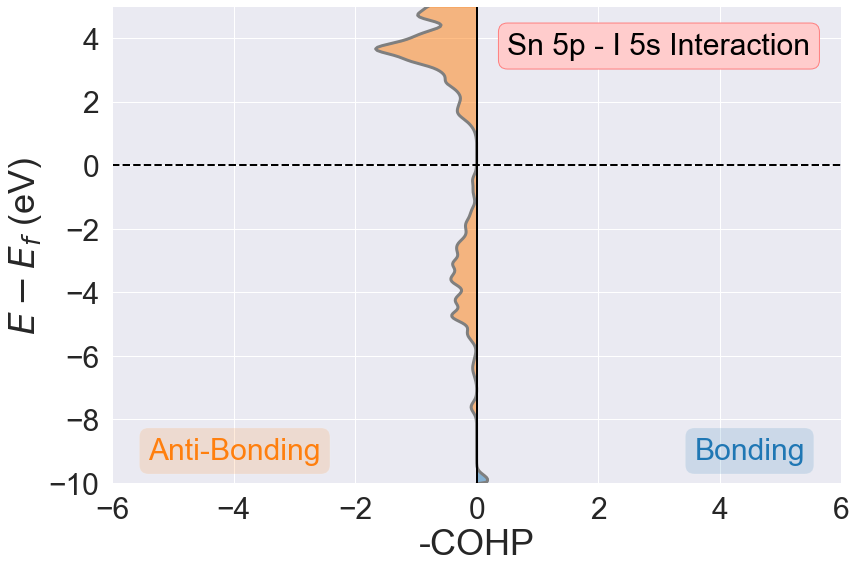

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

from pymatgen.electronic_structure.core import Orbital

#interaction between 5s and 5p
orb_list = []
for five_p_orb in [[5,Orbital.px], [5,Orbital.py], [5,Orbital.pz]]:
    orb_list.append([five_p_orb, [5,Orbital.s]])

cp=CohpPlotter()
#cp.add_cohp(plotlabel,te_te_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
#    label_list=[label]*6, orbital_list=fives_fivep_orb_list))
label_list = []
for i in np.arange(1,15):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sn_I_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*14))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 5p - I 5s Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sn_5p_I_5s_COHP.pdf")

70


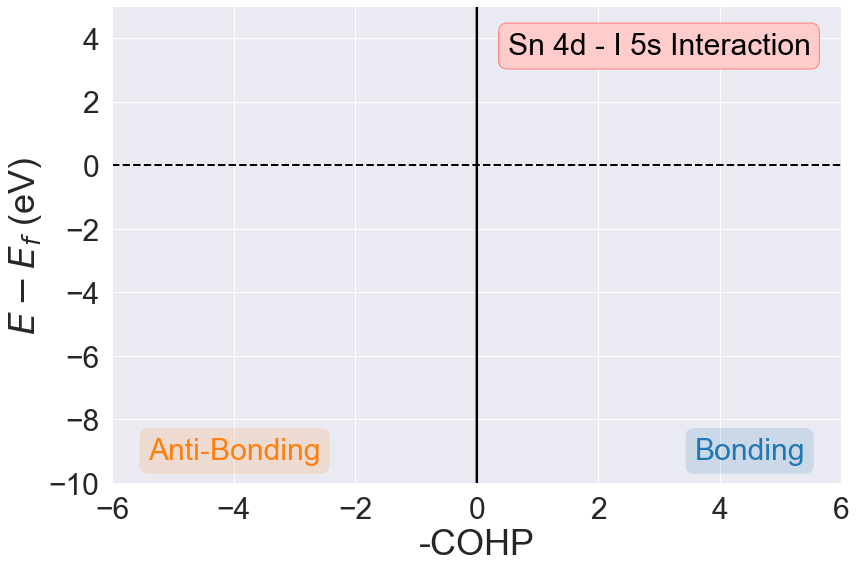

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)

cp=CohpPlotter()
#get a nicer plot label

from pymatgen.electronic_structure.core import Orbital
    
orb_list = []
four_d_orbs = [[4,Orbital.dx2], [4,Orbital.dxy], [4,Orbital.dxz], 
               [4,Orbital.dyz], [4,Orbital.dz2]]
for four_d_orb in four_d_orbs:
    orb_list.append([four_d_orb, [5,Orbital.s]])

cp=CohpPlotter()

label_list = []
for i in np.arange(1,15):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sn_I_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*14))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 4d - I 5s Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sn_4d_I_5s_COHP.pdf")

## Sn - S Interaction

In [34]:
!cat Cmc2_1_Lobster/Sn_S_upto4_ICOHPLIST.lobster

  COHP#  atomMU  atomNU     distance     translation      ICOHP (at) eF   for spin  1
      1     Sn1      S7      2.85032      -1   0   0           -1.96831 
      2     Sn1      S7      2.85032       0   1   0           -1.96829 
      3     Sn1      S8      2.60135       0   0   0           -3.73717 
      4     Sn2      S7      2.69639       0   0   0           -2.87729 
      5     Sn2      S8      2.71205       0  -1   0           -3.04991 
      6     Sn2      S8      2.71205       1   0   0           -3.04997 
      7     Sn3      S9      2.71205      -1   0   0           -3.05001 
      8     Sn3      S9      2.71205       0   1   0           -3.04791 
      9     Sn3     S10      2.69639       0   0   1           -2.87723 
     10     Sn4      S9      2.60135       0   0  -1           -3.72665 
     11     Sn4     S10      2.85032       0  -1   0           -1.96739 
     12     Sn4     S10      2.85032       1   0   0           -1.96391 


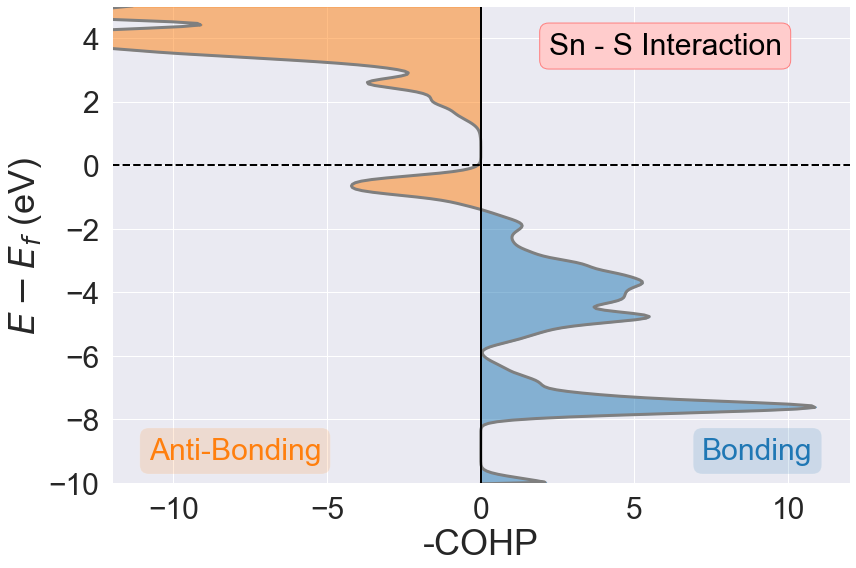

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

cp.add_cohp(plotlabel, Sn_S_orbital_proj_cohp.get_summed_cohp_by_label_list(
    [str(i) for i in np.arange(1,13)]))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-12,12],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn - S Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sn_S_COHP.pdf")

Should be 432 orbital interactions between Sn (4d, 5s, 5p) and S (5s, 5p) (according to the length of `Sn_S_upto4_COHPCAR.lobster`)

In [36]:
# 9 Sn orbitals, 4 atoms, all coordinated to 3 S
# 4 S orbitals, 4 atoms
9*4*4*3 # Yep, checks out

432

In [37]:
36+108+180+12+36+60

432

36


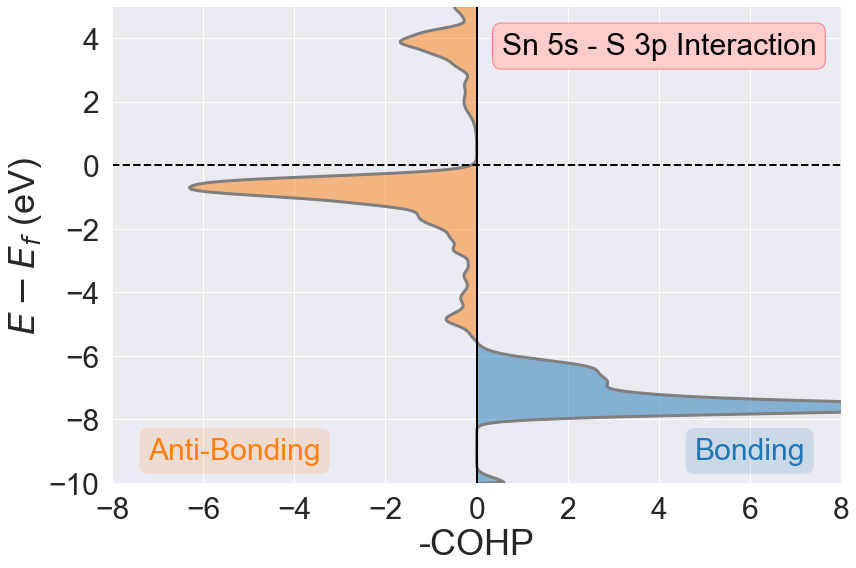

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

from pymatgen.electronic_structure.core import Orbital

#interaction between 5s and 5p
orb_list = []
for three_p_orb in [[3,Orbital.px], [3,Orbital.py], [3,Orbital.pz]]:
    orb_list.append([[5,Orbital.s], three_p_orb])

cp=CohpPlotter()
#cp.add_cohp(plotlabel,te_te_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
#    label_list=[label]*6, orbital_list=fives_fivep_orb_list))
label_list = []
for i in np.arange(1,13):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sn_S_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*12))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-8,8],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 5s - S 3p Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sn_5s_S_3p_COHP.pdf")

108


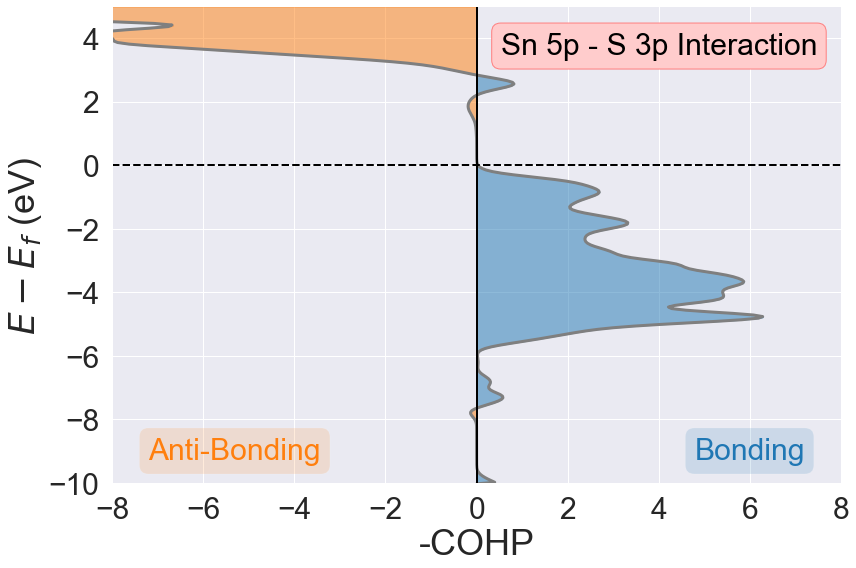

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np
import itertools

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
cp=CohpPlotter()
#get a nicer plot label

from pymatgen.electronic_structure.core import Orbital

orb_list = []
three_p_orbs = [[3,Orbital.px], [3,Orbital.py], [3,Orbital.pz]]
five_p_orbs = [[5,Orbital.px], [5,Orbital.py], [5,Orbital.pz]]

for five_p_orb in five_p_orbs:
    for three_p_orb in three_p_orbs:
        orb_list.append([five_p_orb, three_p_orb])

cp=CohpPlotter()
label_list = []
for i in np.arange(1,13):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
cp.add_cohp(plotlabel, Sn_S_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*12))
print(len(label_list))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-8,8],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 5p - S 3p Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sn_5p_S_3p_COHP.pdf")

180


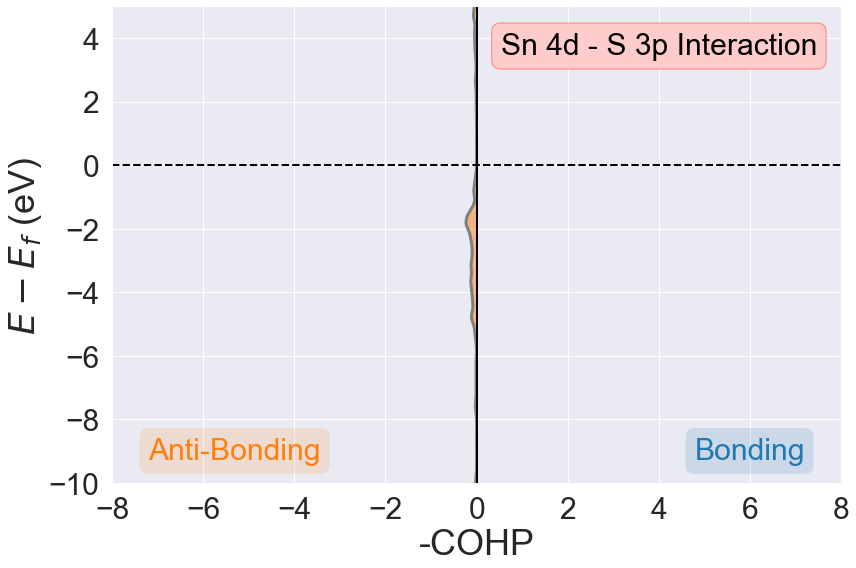

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)

cp=CohpPlotter()
#get a nicer plot label

from pymatgen.electronic_structure.core import Orbital
    
orb_list = []
three_p_orbs = [[3,Orbital.px], [3,Orbital.py], [3,Orbital.pz]]
four_d_orbs = [[4,Orbital.dx2], [4,Orbital.dxy], [4,Orbital.dxz], 
               [4,Orbital.dyz], [4,Orbital.dz2]]
for three_p_orb in three_p_orbs:
    for four_d_orb in four_d_orbs:
        orb_list.append([four_d_orb, three_p_orb])

cp=CohpPlotter()
#cp.add_cohp(plotlabel,te_te_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
#    label_list=[label]*6, orbital_list=fives_fivep_orb_list))
label_list = []
for i in np.arange(1,13):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sn_S_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*12))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-8,8],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 4d - S 3p Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sn_4d_S_3p_COHP.pdf")

12


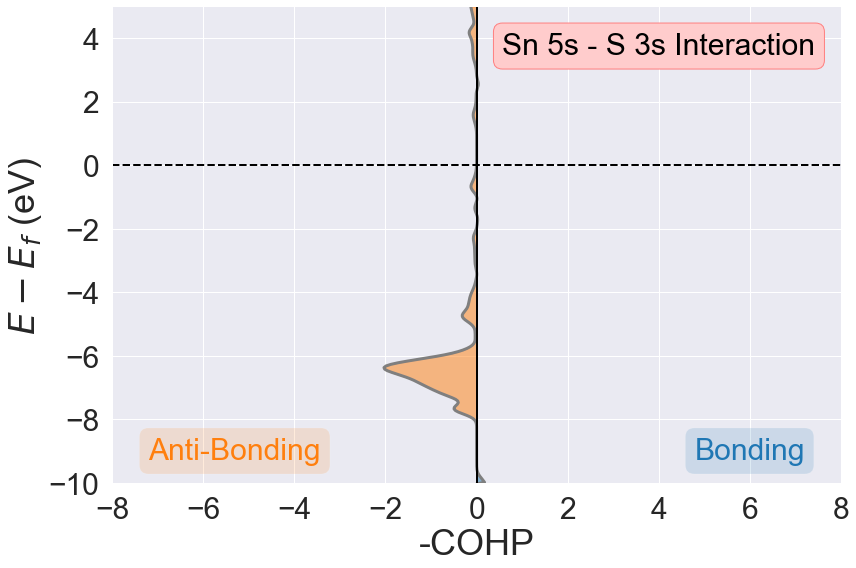

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)

cp=CohpPlotter()
#get a nicer plot label

from pymatgen.electronic_structure.core import Orbital

#interaction between 5s and 5p
orb_list = []
orb_list.append([[5,Orbital.s], [3,Orbital.s]])
#orb_list.append([[5,Orbital.s], [5,Orbital.s]])

cp=CohpPlotter()
label_list = []
for i in np.arange(1,13):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sn_S_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*12))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-8,8],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 5s - S 3s Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sn_5s_S_3s_COHP.pdf")

36


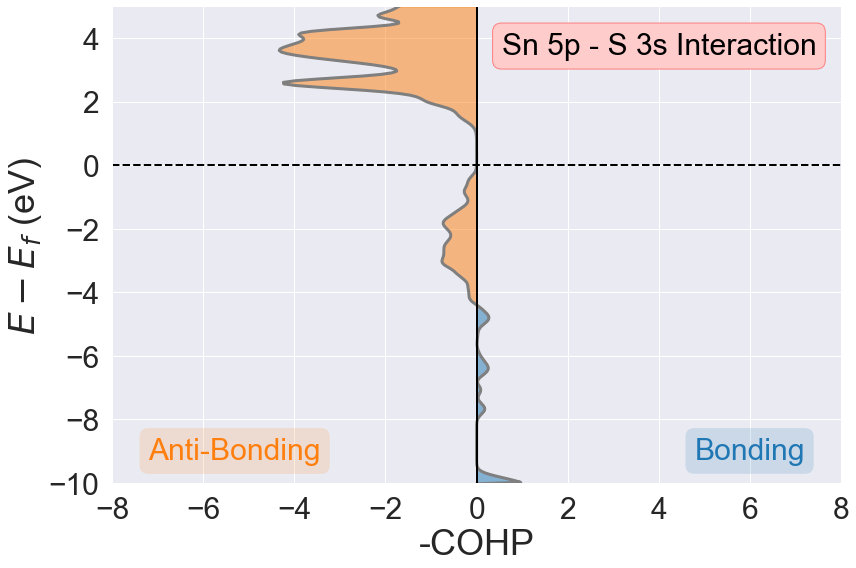

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

from pymatgen.electronic_structure.core import Orbital

#interaction between 5s and 5p
orb_list = []
for five_p_orb in [[5,Orbital.px], [5,Orbital.py], [5,Orbital.pz]]:
    orb_list.append([five_p_orb, [3,Orbital.s]])

cp=CohpPlotter()
#cp.add_cohp(plotlabel,te_te_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
#    label_list=[label]*6, orbital_list=fives_fivep_orb_list))
label_list = []
for i in np.arange(1,13):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sn_S_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*12))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-8,8],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 5p - S 3s Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sn_5p_S_3s_COHP.pdf")

60


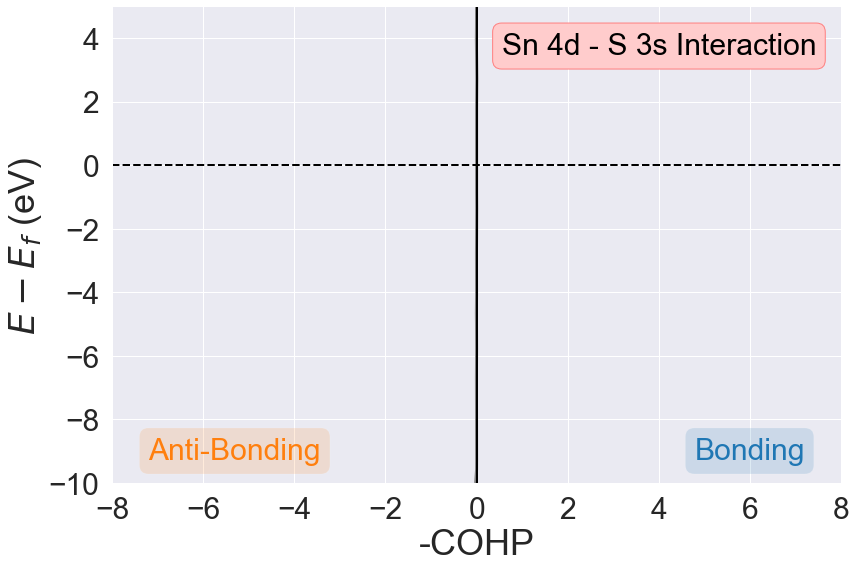

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)

cp=CohpPlotter()
#get a nicer plot label

from pymatgen.electronic_structure.core import Orbital
    
orb_list = []
four_d_orbs = [[4,Orbital.dx2], [4,Orbital.dxy], [4,Orbital.dxz], 
               [4,Orbital.dyz], [4,Orbital.dz2]]
for four_d_orb in four_d_orbs:
    orb_list.append([four_d_orb, [3,Orbital.s]])

cp=CohpPlotter()

label_list = []
for i in np.arange(1,13):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sn_S_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*12))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-8,8],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sn 4d - S 3s Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sn_4d_S_3s_COHP.pdf")

## Sb - I Interaction

In [40]:
!cat Cmc2_1_Lobster/Sb_I_upto4_ICOHPLIST.lobster

  COHP#  atomMU  atomNU     distance     translation      ICOHP (at) eF   for spin  1
      1     Sb5     I11      3.04631       0  -1   0           -1.97611 
      2     Sb5     I11      3.04631       1   0   0           -1.97692 
      3     Sb5     I13      3.16109       0  -1   0           -1.48808 
      4     Sb5     I13      3.16109       1   0   0           -1.48782 
      5     Sb6     I12      3.04631      -1   0   0           -1.97709 
      6     Sb6     I12      3.04631       0   1   0           -1.97586 
      7     Sb6     I16      3.16109      -1   0   0           -1.48887 
      8     Sb6     I16      3.16109       0   1   0           -1.48802 


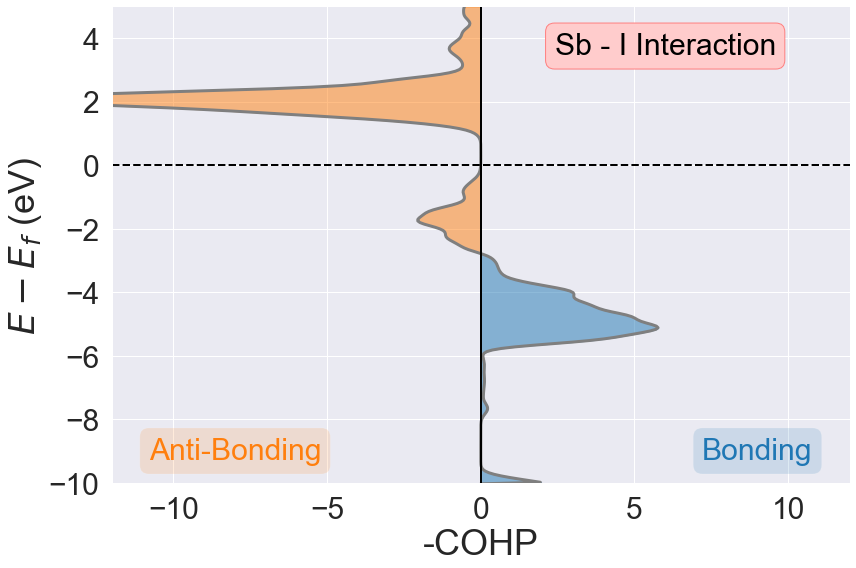

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

cp.add_cohp(plotlabel, Sb_I_orbital_proj_cohp.get_summed_cohp_by_label_list(
    [str(i) for i in np.arange(1,9)]))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-12,12],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sb - I Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sb_I_COHP.pdf")

Should be 128 orbital interactions between Sb (5s, 5p) and I (5s, 5p) (according to the length of `Sb_I_upto4_COHPCAR.lobster`)

In [96]:
# 4 Sn orbitals, 2 atoms each coordinated to 4 I
# 4 I orbitals, 6 atoms
4*4*2*4 # Yep, checks out

128

In [104]:
24+72+8+24

128

24


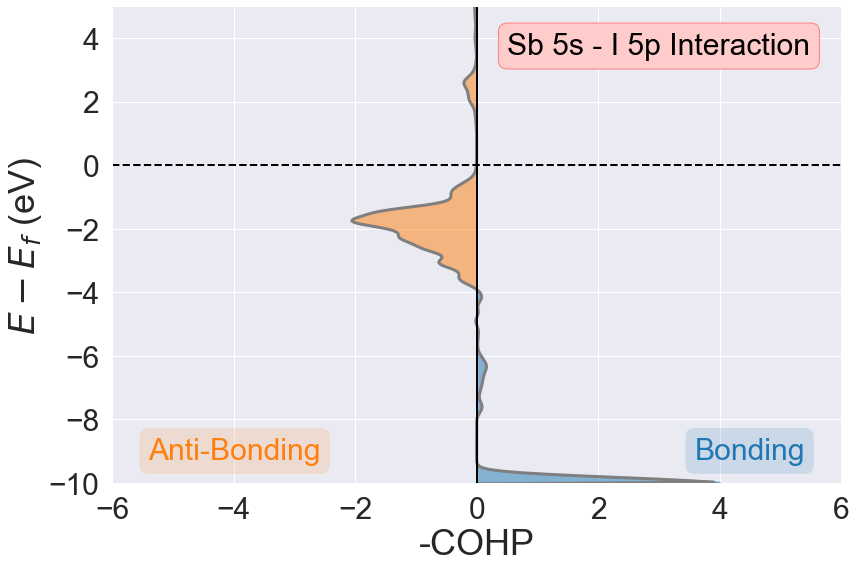

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label

from pymatgen.electronic_structure.core import Orbital

#interaction between 5s and 5p
orb_list = []
for five_p_orb in [[5,Orbital.px], [5,Orbital.py], [5,Orbital.pz]]:
    orb_list.append([[5,Orbital.s], five_p_orb])

cp=CohpPlotter()
label_list = []
for i in np.arange(1,9):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sb_I_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*8))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sb 5s - I 5p Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sb_5s_I_5p_COHP.pdf")

72


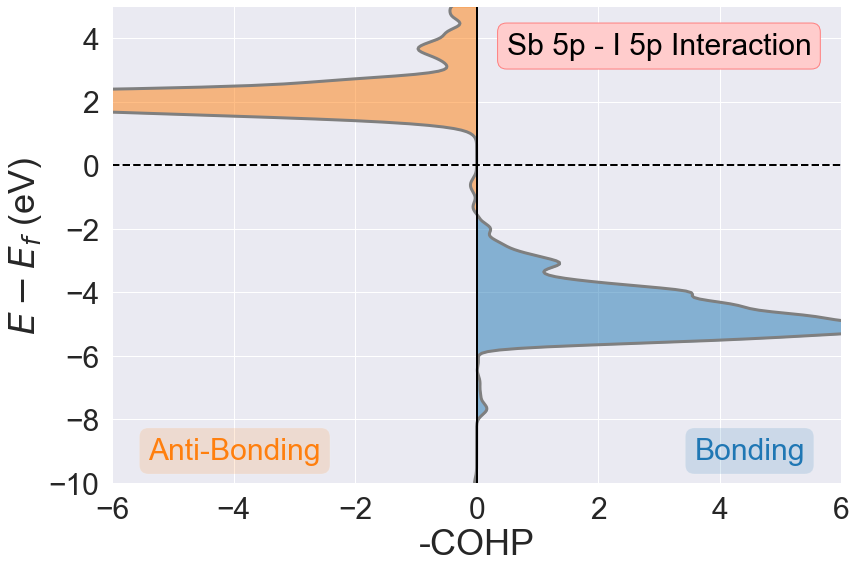

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np
import itertools

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
cp=CohpPlotter()
#get a nicer plot label

from pymatgen.electronic_structure.core import Orbital

#interaction between 5p and 5p
orb_list = []
five_p_orbs = [[5,Orbital.px], [5,Orbital.py], [5,Orbital.pz]]

for i in itertools.product(five_p_orbs, repeat=2):
    orb_list.append(i) 

cp=CohpPlotter()
label_list = []
for i in np.arange(1,9):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
cp.add_cohp(plotlabel, Sb_I_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*8))
print(len(label_list))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sb 5p - I 5p Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sb_5p_I_5p_COHP.pdf")

8


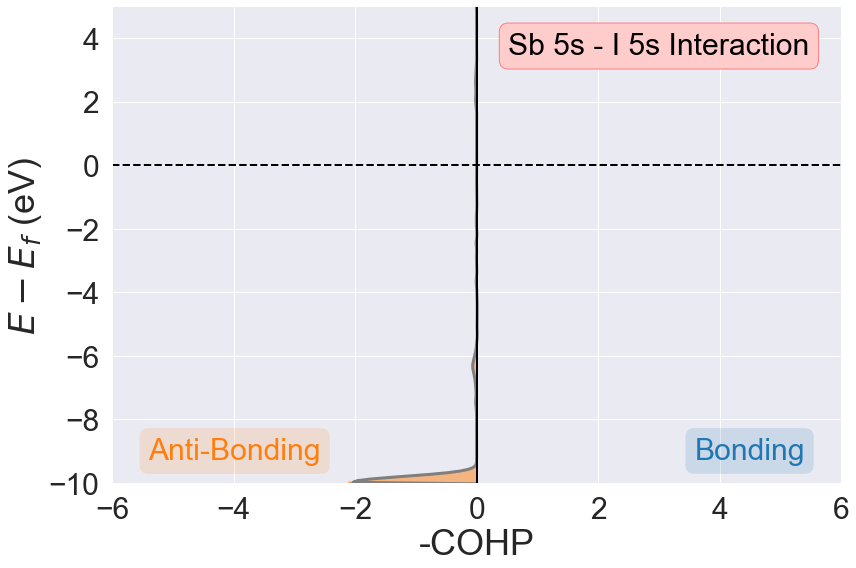

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)

cp=CohpPlotter()
#get a nicer plot label

from pymatgen.electronic_structure.core import Orbital

#interaction between 5s and 5p
orb_list = []
orb_list.append([[5,Orbital.s], [5,Orbital.s]])
#orb_list.append([[5,Orbital.s], [5,Orbital.s]])

cp=CohpPlotter()
label_list = []
for i in np.arange(1,9):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sb_I_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*8))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sb 5s - I 5s Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sb_5s_I_5s_COHP.pdf")

24


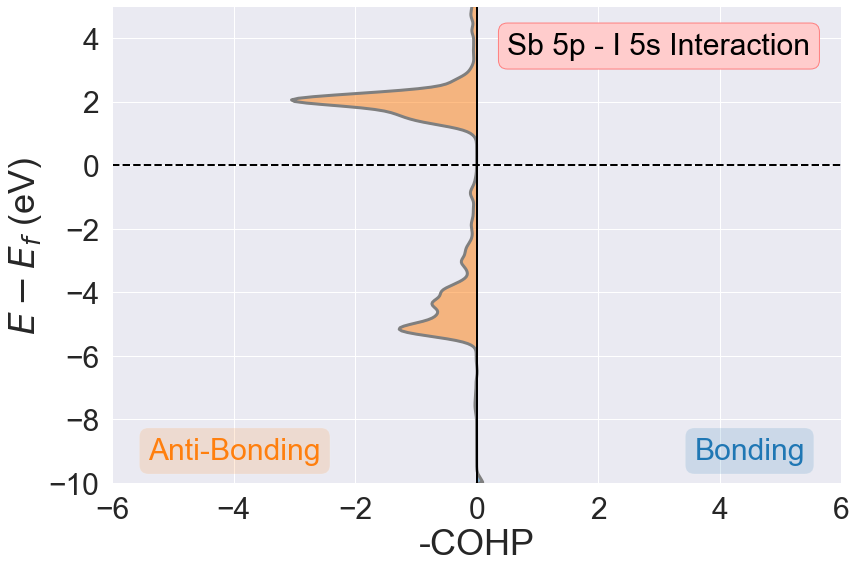

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import interpolate
import numpy as np

sns.set_palette("muted")
sns.set_style("darkgrid")
#plt.style.use("../../Packages/sumo/sumo/plotting/sumo_base.mplstyle")
#mpl.rc("font", **{"family": "serif", "size": 14, "serif": "Helvetica"})
mpl.rc("lines", **{"linewidth": 2})
#mpl.rc("text", **{"usetex": False})

#search for the number of the COHP you would like to plot in ICOHPLIST.lobster (the numbers in COHPCAR.lobster are different!)
#label="81" # Te-Te
cp=CohpPlotter()
#get a nicer plot label
#plotlabel=str(total_cohp.bonds[label]['sites'][0].species_string)+'-'+str(total_cohp.bonds[label]['sites'][1].species_string)

from pymatgen.electronic_structure.core import Orbital

#interaction between 5s and 5p
orb_list = []
for five_p_orb in [[5,Orbital.px], [5,Orbital.py], [5,Orbital.pz]]:
    orb_list.append([five_p_orb, [5,Orbital.s]])

cp=CohpPlotter()

label_list = []
for i in np.arange(1,9):
    for a in range(len(orb_list)):
        label_list.append(str(i))
#print(label_list)
print(len(label_list))
cp.add_cohp(plotlabel, Sb_I_orbital_proj_cohp.get_summed_cohp_by_label_and_orbital_list(
    label_list, orbital_list=orb_list*8))
#check which COHP you are plotting

cp.get_plot(ylim=[-10, 5],xlim=[-6,6],integrated=False); plot = plt.gca()
lines = plot.get_lines(); line = lines[0]; line.set_c("tab:grey")
data = line.get_data(); legend = plot.get_legend(); legend.remove()
text = plt.annotate(r"Sb 5p - I 5s Interaction", ha="center", color="k", xy=(0.75, 0.9), 
                    xycoords='axes fraction', fontsize = 30, 
                    bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
plt.annotate(r"Bonding", ha="right", color="tab:blue", xy=(0.95, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:blue", alpha=0.15))
plt.annotate(r"Anti-Bonding", ha="left", color="tab:orange", xy=(0.05, 0.05), 
                    xycoords='axes fraction', fontsize = 30,
             bbox=dict(boxstyle="round", fc="tab:orange", alpha=0.15))

tck = interpolate.splrep(data[1], data[0], s=0)
ynew = np.arange(-10, 5, 0.001)
xnew = interpolate.splev(ynew, tck, der=0)

yrangeb = [ynew[i] for i in range(len(ynew)) if xnew[i] > 0]
xrangeb = [xnew[i] for i in range(len(ynew)) if xnew[i] > 0]
yrangeab = [ynew[i] for i in range(len(ynew)) if xnew[i] < 0]
xrangeab = [xnew[i] for i in range(len(ynew)) if xnew[i] < 0]
plot.fill_betweenx(yrangeb, 0, xrangeb, color="tab:blue", alpha=0.5)
plot.fill_betweenx(yrangeab, 0, xrangeab, color="tab:orange", alpha=0.5)
plt.savefig("Cmc2_1_Lobster/Sb_5p_I_5s_COHP.pdf")